<div style="border:solid green 2px; padding: 20px">

<b>Привет, Григорий!</b>

Меня зовут Алина Соловьева и я буду проверять твою работу. Попробую помочь сделать тебе её еще лучше! В Практикуме принято общение на ты, но если это дискомфортно, то сообщи об этом)

Ниже ты найдешь мои комментарии - пожалуйста, не перемещай, не изменяй и не удаляй их. Я буду использовать цветовую разметку:

<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☁️Так выделены самые важные замечания. Без их отработки проект не будет принят. </div>

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>⛅️ Так выделены небольшие замечания.Такие замечания в проекте допустимы, это пространство для улучшений в будущем.
</div>

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Так я выделяю успешные идеи.</div>

Давай работать над проектом в диалоге: если ты что-то меняешь в проекте или отвечаешь на мои комменатри — пиши об этом. Мне будет легче отследить изменения, если ты выделишь свои комментарии:
<div class="alert alert-info"> <b>Комментарий студента:</b> Например, вот так.</div>

Всё это поможет выполнить повторную проверку твоего проекта оперативнее.


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☀️Введение - важная часть проекта, не забывай об этом</div>

<div class="alert alert-info"> <b>Введение:</b> Привет. Меня зовут Игор_Манн. Я работаю в интернет-магазине «Стримчик», который продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Мне нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
Передо мной данные до 2016 года. Необходим их проанализировать для дальнейшего построения прогноза на 2017г.

<b>Итак, приступим</b></div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Спасибо ))</div>

Импортируем необходимые библиотеки

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

# Шаг 1.
Откройте файл с данными и изучите общую информацию

In [2]:
data = pd.read_csv('/datasets/games.csv')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☁️В будущем для подгрузки данных рекомендую использовать конструкцию try-except или os.path,так удобнее работать с файлом локально </div>


In [3]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Есть пропуски, есть "непитоновские" названия полей. Исправим это ниже

# Шаг 2.

## Замените названия столбцов (приведите к нижнему регистру)

In [4]:
# переведем названия полей в нижний регистр
data.columns = [x.lower() for x in data.columns]

<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☁️Здесь еще можно использовать 

    data.columns = data.columns.str.lower() 
</div>


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Преобразуйте данные в нужные типы. Опишите, в каких столбцах заменили тип данных и почему

По первым строкам поля critic_score непонятно: поле содержит только целые числа или также и дробные. Посмотрим уникальные значения

In [6]:
data['critic_score'].sort_values().unique()

array([13., 17., 19., 20., 21., 22., 23., 24., 25., 26., 27., 28., 29.,
       30., 31., 32., 33., 34., 35., 36., 37., 38., 39., 40., 41., 42.,
       43., 44., 45., 46., 47., 48., 49., 50., 51., 52., 53., 54., 55.,
       56., 57., 58., 59., 60., 61., 62., 63., 64., 65., 66., 67., 68.,
       69., 70., 71., 72., 73., 74., 75., 76., 77., 78., 79., 80., 81.,
       82., 83., 84., 85., 86., 87., 88., 89., 90., 91., 92., 93., 94.,
       95., 96., 97., 98., nan])

Значения в поле - целые числа. Также посмотрим поля year_of_release и user_score

In [7]:
data['year_of_release'].sort_values().unique()

array([1980., 1981., 1982., 1983., 1984., 1985., 1986., 1987., 1988.,
       1989., 1990., 1991., 1992., 1993., 1994., 1995., 1996., 1997.,
       1998., 1999., 2000., 2001., 2002., 2003., 2004., 2005., 2006.,
       2007., 2008., 2009., 2010., 2011., 2012., 2013., 2014., 2015.,
       2016.,   nan])

In [8]:
data['user_score'].sort_values().unique()

array(['0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1', '1.2',
       '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1', '2.2',
       '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1', '3.2',
       '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1', '4.2',
       '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1', '5.2',
       '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1', '6.2',
       '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1', '7.2',
       '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1', '8.2',
       '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1', '9.2',
       '9.3', '9.4', '9.5', '9.6', '9.7', 'tbd', nan], dtype=object)

Поле user_score содержит дробные числа и значение "tbd". Посмотрим срез датафрейма по данному фильтру.

In [9]:
data[data['user_score']=='tbd']['user_score'].count()/len(data)

0.1450194436135208

Строки с таким значением в поле занимают более 14% датафрейма. Посмотрим первые 10 строк

In [10]:
display(data[data['user_score']=='tbd'].head(10))

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
119,Zumba Fitness,Wii,2010.0,Sports,3.45,2.59,0.00,0.66,NaN,tbd,E
301,Namco Museum: 50th Anniversary,PS2,2005.0,Misc,2.08,1.35,0.00,0.54,61.0,tbd,E10+
520,Zumba Fitness 2,Wii,2011.0,Sports,1.51,1.03,0.00,0.27,NaN,tbd,T
645,uDraw Studio,Wii,2010.0,Misc,1.65,0.57,0.00,0.20,71.0,tbd,E
657,Frogger's Adventures: Temple of the Frog,GBA,NaN,Adventure,2.15,0.18,0.00,0.07,73.0,tbd,E
718,Just Dance Kids,Wii,2010.0,Misc,1.52,0.54,0.00,0.18,NaN,tbd,E
726,Dance Dance Revolution X2,PS2,2009.0,Simulation,1.09,0.85,0.00,0.28,NaN,tbd,E10+
821,The Incredibles,GBA,2004.0,Action,1.15,0.77,0.04,0.10,55.0,tbd,E
881,Who wants to be a millionaire,PC,1999.0,Misc,1.94,0.00,0.00,0.00,NaN,tbd,E
1047,Tetris Worlds,GBA,2001.0,Puzzle,1.25,0.39,0.00,0.06,65.0,tbd,E


При поверхностном взгляде определить какие то характерные признаки в других полях, определяющие появление значений 'tbd' в поле 'user_score' нельзя. При этом остальные значения в поле - числовые. Скорее всего, аббревиатура tbd используется в смысле To Be Determined (будет определено) (маловерятно, что это, например- Tibetan Book of the Dead).

"Будет определено" - поэтому (для целей возможности дальнейшего преобразования типа данного поля из object во float) сейчас и определим это значение  как условную "-1". В дальнейшем при необходимости будем применять соответствующий фильтр, чтобы не включать "-1"

<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☁️Да, это допустимо. Главное потом не забыть исключать из анализа такие пропуски 
</div>


In [11]:
idx=data[data['user_score']=='tbd'].index
data.loc[idx,'user_score']='-1'
data['user_score'].sort_values().unique()

array(['-1', '0', '0.2', '0.3', '0.5', '0.6', '0.7', '0.9', '1', '1.1',
       '1.2', '1.3', '1.4', '1.5', '1.6', '1.7', '1.8', '1.9', '2', '2.1',
       '2.2', '2.3', '2.4', '2.5', '2.6', '2.7', '2.8', '2.9', '3', '3.1',
       '3.2', '3.3', '3.4', '3.5', '3.6', '3.7', '3.8', '3.9', '4', '4.1',
       '4.2', '4.3', '4.4', '4.5', '4.6', '4.7', '4.8', '4.9', '5', '5.1',
       '5.2', '5.3', '5.4', '5.5', '5.6', '5.7', '5.8', '5.9', '6', '6.1',
       '6.2', '6.3', '6.4', '6.5', '6.6', '6.7', '6.8', '6.9', '7', '7.1',
       '7.2', '7.3', '7.4', '7.5', '7.6', '7.7', '7.8', '7.9', '8', '8.1',
       '8.2', '8.3', '8.4', '8.5', '8.6', '8.7', '8.8', '8.9', '9', '9.1',
       '9.2', '9.3', '9.4', '9.5', '9.6', '9.7', nan], dtype=object)

Теперь произведем следующие изменения типов данных

    critic_score: float64 -> int64
    user_score: object -> float64
    year_of_release: float64 -> Int64 (используем Int64 а не int64, чтобы сохранить пропуски)

In [12]:
data['critic_score']=data['critic_score'].astype(float)
data['user_score']=data['user_score'].astype(float)
data['year_of_release']=data['year_of_release'].astype('Int64')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16715 non-null  float64
 5   eu_sales         16715 non-null  float64
 6   jp_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.4+ MB


## Обработайте пропуски при необходимости:

Создадим датафрейм с общей информацией по полям (название поля, поличество пропусков, тип, стат метрики для числовых полей).

In [13]:
def summary_table():
    df = pd.DataFrame({'col_null_count':data.isna().sum()},index=data.isna().sum().index)
    df['col_type']=data.dtypes
    df = df.join(data.describe().transpose())
    df['mean_median']=(df['mean']-df['50%'])/df['50%'] # превышение медианы над средним
    df_style = {'count':'{:.0f}','mean':'{:.2f}','mean_median':'{:.2%}', # словарь для форматирования вывода
                'std':'{:.2f}','min':'{:.1f}','25%':'{:.1f}','50%':'{:.1f}','75%':'{:.1f}','max':'{:.1f}'}
    return df, df_style
df, df_style = summary_table()
df.style.format(df_style)

,col_null_count,col_type,count,mean,std,min,25%,50%,75%,max,mean_median
name,2,object,nan,nan,nan,nan,nan,nan,nan,nan,nan%
platform,0,object,nan,nan,nan,nan,nan,nan,nan,nan,nan%
year_of_release,269,Int64,16446,2006.48,5.88,1980.0,2003.0,2007.0,2010.0,2016.0,-0.03%
genre,2,object,nan,nan,nan,nan,nan,nan,nan,nan,nan%
na_sales,0,float64,16715,0.26,0.81,0.0,0.0,0.1,0.2,41.4,229.22%
eu_sales,0,float64,16715,0.15,0.50,0.0,0.0,0.0,0.1,29.0,625.30%
jp_sales,0,float64,16715,0.08,0.31,0.0,0.0,0.0,0.0,10.2,inf%
other_sales,0,float64,16715,0.05,0.19,0.0,0.0,0.0,0.0,10.6,373.42%
critic_score,8578,float64,8137,68.97,13.94,13.0,60.0,71.0,79.0,98.0,-2.86%
user_score,6701,float64,10014,5.16,3.72,-1.0,2.4,6.9,8.0,9.7,-25.24%


Запишем на память список исходных полей

In [14]:
base_list = ['name','platform','year_of_release','genre',
             'na_sales','eu_sales','jp_sales','other_sales',
             'critic_score','user_score','rating']

Оценим случайность появления пропусков в каждом поле (а также случайность соответствия значений поля какому то условию). А также оценим распределение значений в каждом поле. Для этого создадим 3 функции, которые строят 3 датафрейма:

   1) матрица показателей совместного появления пропусков: берем каждое поле (базовое) с пропусками и смоотрим поочередно другие поля (расчетные) - считаем количество соместных пропусков, и долю этого количества в количестве пропусков в базовом поле. При получении значения коэффициента близкого к единице (либо больше заданного уровня отсечки) как в прямом расчете (базовое поле и расчетное) так и в обратном, можно говорить о зависимом (совместном) появлении пропусков в обоих полях и, соответветственно, о необходимости совместной обработки пропусков в таких полях.

   Также для проверки случайности / зависимости соответствия выборки значений в базовом поле по какому то условию отбора (например наличие пропусков) от распределения значений в других (расчетных) полях, посмотрим насколько равномерно распределены (сгруппированы) значения других (расчетных) полей при отборе данных в датафрейме по условию в базовом поле. Для этого создадим 2 функции, которые получат в качестве аргументов датафрейм с общей информацией по полям таблицы (data), количество разбиений (корзин) на которые будем делить значения расчетных полей, количество корзин с наибольшим весом (топ-1, 2, 3..). Функции будут возвращать 2 датафрейма:

   2) таблицу с интервалами разбиения расчетных полей и весом интервалов для каждого анализируемого базового поля (с условием отбора) и каждого расчетного поля: аналог гистограммы распределения в табличном виде и совокупно по всем полям.

   3) матрицу суммарных весов топ корзин распределения в расчетных полях.

Анализ второго датафрейма поможет определить наличие / отсутствие зависимости появления соответствия какому то условию (например, наличие пропусков) в одних (базовых) полях от распределения значений в других (расчетных) полях. Т.е., например, если все (почти) пропуски в каком то базовом поле приходятся на какую то из корзин расчетного поля, это может говорить о наличии зависимости и служить дополнительным инструментом для правильной обработки пропусков.

In [15]:
cutoff = 0.9 # отсечка - уровень "зависимости" пропусков в полях

# I. Функция для построения матрицы совместного появления пропусков
def null_matrix(cutoff):
    df, df_style = summary_table()
    null_list = df[df['col_null_count'] != 0].index # список полей с пропусками
    mis_matrix = pd.DataFrame(index=null_list)      # датафрейм - матрица
    cutoff_list = []

    for base in null_list:                          # пройдем по списку полей с пропусками
        calc_base = df.loc[base]['col_null_count']
        for calc in null_list: # для каждого такого поля еще пройдем по списку полей с пропусками
            calc_mis = len(data.loc[(data[base].isna()) & 
                                    (data[calc].isna())][calc])/calc_base # доля совпадающих пропусков
            mis_matrix.at[base,calc] = calc_mis
    for base in null_list: # еще раз пройдем по матрице, чтобы убрать значения меньше занной отсечки cutoff
        for calc in null_list:
            if mis_matrix.loc[base,calc] < cutoff or mis_matrix.loc[calc,base] < cutoff or calc == base:
                # значения меньше уровня отсечки в матрице будем обнулять
                # значение 1 в диагонали матрицы будем обнулять.
                mis_matrix.loc[base,calc] = 0
                mis_matrix.loc[calc,base] = 0
            elif base not in cutoff_list:
                cutoff_list.append(base)

    cutoff_matrix = pd.DataFrame(index=cutoff_list) # сокращенная после отсечки матрица совместных пропусков
    for base in cutoff_list:
        for calc in cutoff_list:
            cutoff_matrix.at[base,calc] = mis_matrix.loc[base,calc]
            if base == calc:
                cutoff_matrix.at[base,calc] = 1
    return cutoff_matrix

In [16]:
# II. Функция построения датафрейма распределния значений расчетных полей по интервалам
#             при фильтрации по заданному условию в базовом поле
#             в качестве базовых полей можно использовать:
#             1. в случае анализа пропусков (.isna()) - любые поля таблицы
#             2. при использовании условий фильтрации - только числовые поля

# блок значений переменных функции / описание ниже,  в теле функции
#-------------------------------------------------------------
panni = 20              # количество корзин
qmx =  1                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = ''          # условие отбора в базовых полях
simple = True           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = [  ]           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  []
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк

    # зависимость переменных:
# top <= panni
# somple = False -> condition != ''
# b_list_use = True -> b_list != ['']
# c_list_use = True -> c_list !=['']

#--------------------------------------------------------------

def condition_depend(panni,qmx,qmn,condition,simple,
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,
                     cond_count_use):
    
    # panni -     количество корзин для числовых полей
    # qmx -       верхний квантиль для ограничения интервалов (для отсечения верхних выбросов)
    # qmn -       нижний квантиль для ограничения интервалов (для отсечения нижних выбросов)
    # condition - условиe, по которому фильтруется базовое поле
               #  например condition = '@cond_clmn.isna()' или '@cond_clmn > @cond_clmn.quantile(0.9)'
               #  где @cond_clmn - базовое поле (например из списка b_list)
    # simple -    если = True - просто смотрим распределения по всем полям по их корзинам
               #  без использования условия в базовом поле
    # data -      общий анализируемый датафрейм
    # df -        сводный для data датафрейм (названия, типы полей, статметрики)
    # b_list -    список базовых полей для проверки на условия
              #   для проверки пропусков возможны любые поля, для других условий- пока только числовые
    # b_list_use- True - использовать заданный список, False- используется все поля таблицы
    # c_list -    список расчетных полей
    # c_list_use- True - использовать заданный список, False- используется все поля таблицы
    # cond_count_use - True - считать долю корзины как отношение корзины к количеству строк,
              #   которые были отобраны в фильтре по базовому полю
              #   False - отношение к общему количеству строк расчетного поля

    df, df_style = summary_table()
    
    #print('df 1:')
    #print(df)
    
    digit_list = df[(df['col_type'] == 'int64') |
                    (df['col_type'] == 'float64') ].index     # список числовых полей для расчетных полей

    date_list  = df[(df['col_type'] == 'datetime64[ns]')].index  # список числовых полей с датами
    
    other_list = df[(df['col_type'] != 'int64') &
                    (df['col_type'] != 'float64') &
                    (df['col_type'] != 'datetime64[ns]') &
                    (df.index != 'first_day_exposition')
                # & (df.index != 'first_day_exposition_date')
                                                        ].index # список нечисловых полей для расчетных полей
                                                                # функция получилась не совсем универсальной
                                                                # из-за поля first_day_exposition
    if simple: # если простой анализ (без фильтрации в базовом поле)
        null_list = ['simple'] # имя переменной null_list было взято изначально, когда предполагалось
                               # использовать функцию только для анализа пустых значений
                               # это список базовых полей, по которым фильтруется таблица
    elif condition == '@cond_clmn.isna()':
        null_list = df[(df['col_null_count'] != 0)].index    # список полей с пропусками для базовых полей
    else:
        null_list = digit_list # список числовых полей: если не смотрим .isna() и не simple
                               # значит условие содержит операции сравнения, т.е. работу с числами
                               # условия для строковых данных пока не используются в функции
    #print('null_list before')
    #print(null_list)
    #print('other_list before')
    #print(other_list)
    if b_list_use and b_list != [''] and simple: # фильтрация списка расчетных полей
        digit_list= digit_list[digit_list.isin(b_list)]
        other_list= other_list[other_list.isin(b_list)]
        date_list = date_list[date_list.isin(b_list)]
    if b_list_use and b_list != ['']: # фильтрация списка базовых полей
        null_list = b_list

    #print('null_list before1')
    #print(null_list)
    #print('digit_list before1')
    #print(digit_list)
    #print('other_list before1')
    #print(other_list)
    #print('date_list before1')
    #print(date_list)
    if c_list_use and not simple: # фильтрация списка расчетных полей
        digit_list = digit_list[digit_list.isin(c_list)]
        other_list = other_list[other_list.isin(c_list)]
        date_list  = date_list[date_list.isin(c_list)]
    
    #print('digit_list after')
    #print(digit_list)
    #print('other_list after')
    #print(other_list)
    #print('date_list after')
    #print(date_list)
    #print('null_list after')
    #print(null_list)

        
    nd = pd.DataFrame(index=range(panni)) # создадим сводный датафрейм с корзинами разбиений,
                                          # в который будем добавлять столбцы
    
   # 1. проходим по списку базовых полей (с пропусками)
    for base in null_list:                # 
        if simple:
            idx_true=df.index[0]+' == '+df.index[0] # условие для полного отбора
            cond = idx_true               # если выбрано условие simple=True - не проходим по базовым полям,
                                          # не фильтруем по условию .isna() в базовом поле
                                          # просто смотрим всю таблицу на разбиения
        else:
            cond_clmn = data[base]
            cond = condition              # строка-условие для фильтрации датафрейма по базовому полю
        
        # 1.1. вложенный цикл по расчетным числовым полям
        for calc in digit_list:           # 
            #print('calc',calc)
            panniers = panni              # на каждой итерации цикла обновляем количество корзин
            col_uniq = data.query(cond)[calc].nunique()  # количество уникальных значений в расчетном поле 
            panniers = min(panniers,col_uniq) # количество корзин должно быть не больше кол-ва уник значений
            panniers = max(panniers,1)    # количество корзин должно быть больше 0
            if col_uniq <= panni:         # для малого количества уникальных значений "режем"
                bins = np.linspace((data.query(cond)[calc].min()-0.01), # отнимаем 1 для включения нижней границы
                                   data.query(cond)[calc].max(), col_uniq+1)  # интервалы по уникальным значенияч
                #bins = col_uniq
                cut_label = range(col_uniq) # метки (индексы) корзин для всех полей сделаем однотиными- т.е. пронумеруем
            else:                         # для больших рядов "режем" на ровные части с отсечением
                bins=np.linspace((data.query(cond)[calc].quantile(qmn)-0.01), # нижнего квантиля
                                  data.query(cond)[calc].quantile(qmx),    # и верхнего квантиля
                                  panniers+1)
                cut_label = range(min(panniers,bins.shape[0]))
            #print('data.query(cond)[calc].min()', data.query(cond)[calc].min())
            #print('data.query(cond)[calc].quantile(qmn)',data.query(cond)[calc].quantile(qmn))
            #print('base, calc,col_uniq',base, calc,col_uniq)
            if col_uniq>0: #and base != calc
                #print('base, calc',base, calc)
                nulldata  = pd.cut(data.query(cond)[calc], # разбивка по интервалам, индекс- нумерация (0-panniers)
                                   bins,
                                   labels=cut_label).value_counts(sort=False)
                nulldata1 = pd.cut(data.query(cond)[calc], # разбивка по интервалам - индекс- границы интервалов
                                   bins).value_counts(sort=False)
                #print('nulldata',nulldata)
                #print('nulldata1',nulldata1)
                col_int = calc+'_int'  # наименование поля интервала- расчетное поле + суфикс
                col_cnt = calc+'_cnt'  # наименование поля количество значений в интервале- расчетное поле + суфикс
                cond_count = data[~data[calc].isna()][calc].count() # кол-во непустых значений в расчетном поле
                #print('calc:',calc,', cond_count: ',cond_count,', data[calc].count(): ',data[calc].count())
                if cond_count_use:     # кол-во непустых значений в расч поле, в строках отфильтрованных по условию
                    cond_count = data.query(cond)[calc].count()
                if cond_count > 0:     # исключим деление на ноль
                    nd_col = pd.DataFrame({(base,col_int):nulldata1.index,
                                           (base,col_cnt):nulldata
                                           /cond_count},
                                            index=range(panniers))
                else:
                    nd_col = pd.DataFrame({(base,col_int):nulldata1.index,
                                           (base,col_cnt):0},
                                            index=range(panniers))
                nd = pd.concat((nd,nd_col),axis=1) # добавление полученных значений разбивки в сводный датафрейм
        
        
        # 1.2. вложенный цикл для нечисловых полей
        for calc in other_list:
            col_uniq = data.query(cond)[calc].nunique()  # количество уникальных значений в расчетном поле 
            panniers = max(col_uniq,1)
            panniers = min(panni,col_uniq)
            nulldata  = data.query(cond)[calc].value_counts(sort=False).nlargest(panniers) # берем только то, что "влазит"
                                                                                           # в нашу разбивку
            col_int = calc+'_int'
            col_cnt = calc+'_cnt'
            nd_col  = pd.DataFrame({(base,col_int):nulldata.index},index=range(panniers))
            nulldata.reset_index(drop=True,inplace=True)
            cond_count = data[~data[calc].isna()][calc].count() # кол-во непустых значений в расчетном поле
            if cond_count_use:     # кол-во непустых значений в расч поле, в строках отфильтрованных по условию
                cond_count = data.query(cond)[calc].count()
            if cond_count > 0:
                nd_col2 = pd.DataFrame({(base,col_cnt):nulldata
                                       /cond_count},
                                        index=range(panniers))
            else:
                nd_col2 = pd.DataFrame({(base,col_cnt):0},
                                        index=range(panniers))
            #nd_col = pd.concat((nd_col,nd_col2),axis=1)
            nd = pd.concat((nd,nd_col,nd_col2),axis=1)
        
        for calc in date_list:
            calc_clmn = data[calc]
            col_int = calc+'_int'
            col_cnt = calc+'_cnt'
            if cond != '' and cond != '@cond_clmn.isna()': # фильтрация расчетного поля для построения интервалов
                cond = cond+' and @calc_clmn > @calc_clmn.quantile(@qmn) and @calc_clmn < @calc_clmn.quantile(@qmx)'
            else:
                cond = '@calc_clmn > @calc_clmn.quantile(@qmn) and @calc_clmn < @calc_clmn.quantile(@qmx)'
            col_uniq = data.query(cond)[calc].nunique()  # количество уникальных значений в расчетном поле 
            panniers = max(col_uniq,1)
            panniers = min(panni,col_uniq)
            nulldata  = pd.cut(data.query(cond)[calc], # разбивка по интервалам, индекс- нумерация (0-panniers)
                                   bins=panniers).value_counts(sort=False)
            #print('*** nulldata before: ')
            #print(nulldata)
            nd_col  = pd.DataFrame({(base,col_int):nulldata.index},index=range(panniers))
            nulldata.reset_index(drop=True,inplace=True)
            #print('*** nulldata after: ')
            #print(nulldata)
            cond_count = data[~data[calc].isna()][calc].count() # кол-во непустых значений в расчетном поле
            #print('date count before:',cond_count)
            if cond_count_use:     # кол-во непустых значений в расч поле, в строках отфильтрованных по условию
                cond_count = data.query(cond)[calc].count()
            if cond_count > 0:
                nd_col2 = pd.DataFrame({(base,col_cnt):nulldata
                                       /cond_count},
                                        index=range(panniers))
            else:
                nd_col2 = pd.DataFrame({(base,col_cnt):0},
                                        index=range(panniers))
            #print('date count before:',cond_count)
            #print('*** nd_col2: ')
            #print(nd_col2)
            #print('*** nd before')
            #print(nd)
            #nd_col = pd.concat((nd_col,nd_col2),axis=1)
            nd = pd.concat((nd,nd_col,nd_col2),axis=1)
            #print('*** nd after')
            #print(nd)
            
    return nd
#fract_table = condition_depend(panni,qmx,qmn,condition,simple,
#                     data,
#                     b_list,b_list_use,
#                     c_list,c_list_use,cond_count_use)
#fract_table

In [17]:
# III. Функция построения датафрейма с матрицей суммарных весов Топ корзин,
#              полученных функцией condition_depend()

# посчитаем метрику: сумму значений из Топ N корзин (top_n_sum)

#-----------------------------------------------------------------------------------
def condition_concentrate(cutoff,simple,top,fract_table,df,b_list,b_list_use):

# cutoff -      уровень отсечения (от 0 до 1) суммы Топ N корзин при формировании
#               таблицы распределения по условию в базовом поле
#               при построении простой таблицы распределения значений cutoff не используется
# simple -      при данном условии = True - просто смотрим распределения по всем полям по их корзинам
#               то же, что в condition_depend()
# top -         количество "верхних" корзин для расчета приходящегося на них веса
# fract_table - датафрейм, построенный функцией condition_depend()
# df -          сводный для data датафрейм (названия, типы полей, статметрики)
# b_list -      список базовых полей для проверки на условия
#               для проверки пропусков возможны любые поля, для других условий- только числовые
# b_list_use-   True - использовать заданный список, False- используется все поля таблицы

    df, df_style = summary_table()
    #print('df2:')
    #print(df)
    
    fr_list = [column for column in fract_table] # список полей таблицы интервалов
    #print('fr_list: ',fr_list)
    fin_list =[]     # список полей без суфиксов. В итоговом датафрейме - это будет названиями строк
    if b_list_use:   # если задан список
        fin_list = b_list
    else:
        for b,c in fr_list:
            #print('b, c:',b,'*/*',c)
            if '_cnt' in c:
                c=c.replace('_cnt','')
            if '_int' in c:
                c=c.replace('_int','')
            if c not in fin_list:
                fin_list.append(c)
    # 1. если используем условия фильтрации в базовом поле
    if not simple:
        xd = pd.DataFrame(index=fin_list) # итоговый датафрейм
        for base in fin_list:             # проходим по всем базовым полям
            for b, calc in fr_list:       # вложенный цикл - по второму ярусу названия полей в fract_table
                if base == b and '_cnt' in calc: # используем поля со значениями распределений
                    top_n_sum = fract_table.nlargest(top, [(b,calc)])[(b,calc)].sum() # сумма топ корзин
                    top_fract = top_n_sum # здесь "лишняя" переменная- осталась от другой формулы. не стал менять
                    calc = calc.replace('_cnt','')
                    if top_fract >= cutoff: # добавляем в итоговую таблицу только суммы, превышающие отсечку
                        xd.at[base,calc] = top_fract
    
    # 2. если НЕ используем условия фильтрации в базовом поле
    else:
        xd_list = df.index                  # список всех полей таблицы
        if b_list_use:                      # фильтруем список при b_list_use=True
            xd_list=xd_list[xd_list.isin(b_list)]
        xd = pd.DataFrame(index=xd_list)    # итоговый датафрейм
        for calc in xd_list:                # проход по всем полям
            col_uniq = data[calc].nunique() # расчет количества уникальных значений
            xd.at[calc,'nunique']=col_uniq  # создание отдельного поля с кол-вом уникальных значений
            xd.at[calc,'not_nan_count']=data[~data[calc].isna()][calc].count() # количество не пустых значений
            xd.at[calc,'nan_count']=df.loc[calc,'col_null_count']
            xd.at[calc,'nan_ratio']=xd.loc[calc,'nan_count']/(xd.loc[calc,'nan_count']+xd.loc[calc,'not_nan_count'])
            xd.at[calc,'data_type']=data.dtypes[calc]
        for t in range(top):                # цикл по топ корзинам. считаем суммы 1, 1+2, 1+...+N топ корзин
            for b, calc in fr_list:
                if '_cnt' in calc:
                    top_n_sum = fract_table.nlargest((t+1), [(b,calc)])[(b,calc)].sum()
                    conc='conc_'+str(panni)+'_'+str(t+1) # создание поля для суммы Топ(1+..)корзин
                    calc=calc.replace('_cnt','')
                    top_fract = top_n_sum
                    xd.at[calc,conc]=top_fract
    return xd
#fract_table = condition_depend(panni,qmx,qmn,condition,simple,
#                     data,
#                     b_list,b_list_use,
#                     c_list,c_list_use,cond_count_use)

#condition_concentrate(0.0,simple,top,
#                      fract_table,
#                      df,b_list,b_list_use)

In [18]:
# IV функция со сводными данными
def result_table(data):
    panni = 20              # количество корзин
    qmx =  1                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
    qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
    condition = ''          # условие отбора в базовых полях
    simple = True           # False - используем условие отбора в базовых полях
    top = 1                 # количество Топ корзин разбиения
    b_list = ['']           # список базовых полей
    b_list_use = False      # использовать / нет список базовых полей
    c_list = ['']           # список расчетных полей
    c_list_use = False      # использовать / нет список расчетных полей
    cond_count_use = False  # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                            # False- доля в корзинах считается по отношению к общему количеству строк
    #-------------------------------------------------------------------
    fract_table = condition_depend(panni,qmx,qmn,condition,simple,
                         data,
                         b_list,b_list_use,
                         c_list,c_list_use,cond_count_use)
    cutoff = 0.0
    cond_conc = condition_concentrate(cutoff,simple,top,fract_table,df,b_list,b_list_use).sort_values(by='nunique')
    return cond_conc

Выведем общую информацию и посмотрим матрицу совместного появления пустых значений

In [19]:
base_rezult = result_table(data)
display(base_rezult)
cutoff = 0
null_matrix(cutoff)

,nunique,not_nan_count,nan_count,nan_ratio,data_type,conc_20_1
rating,8.0,9949.0,6766.0,0.404786,object,0.401045
genre,12.0,16713.0,2.0,0.000120,object,0.201580
platform,31.0,16715.0,0.0,0.000000,object,0.129285
year_of_release,37.0,16446.0,269.0,0.016093,Int64,0.086769
critic_score,82.0,8137.0,8578.0,0.513192,float64,0.118717
user_score,96.0,10014.0,6701.0,0.400897,float64,0.242061
other_sales,155.0,16715.0,0.0,0.000000,float64,0.986539
jp_sales,244.0,16715.0,0.0,0.000000,float64,0.966019
eu_sales,307.0,16715.0,0.0,0.000000,float64,0.984445
na_sales,402.0,16715.0,0.0,0.000000,float64,0.981932


,name,year_of_release,genre,critic_score,user_score,rating
name,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
year_of_release,0.000000,1.000000,0.000000,0.427509,0.349442,0.327138
genre,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000
critic_score,0.000233,0.013406,0.000233,1.000000,0.776754,0.779086
user_score,0.000298,0.014028,0.000298,0.994329,1.000000,0.989405
rating,0.000296,0.013006,0.000296,0.987733,0.979899,1.000000


Данная матрица (null_matrix(cutoff) - вторая таблица) читается следующим образом: возьмем строку year_of_release. Произведена фильтрация датасета по наличию пропусков в year_of_release, посчитано их количество. Данный отфильтрованованный сегмент опять фильтруется по наличию пропусков теперь уже в других полях и полученное количество пропусков делится на количество пропусков в year_of_release. Соотвтественно, для ячейки матрицы (year_of_release,year_of_release) значение равно 1, для (year_of_release,critic_score) = 0.427509, и т.д.

Если показатель для ячеек (Поле1,Поле2) и (Поле2,Поле1) одновременно равен или близок к 1 это говорит о совместном одновременном появлении пропусков в двух полях.

Уровень отсечки cutoff позволяет фильтровать матрицу по уровню одновременных значений (Поле1,Поле2) и (Поле2,Поле1) матрицы больше cutoff.

Видим, что в полях name и genre пропуски - совместные (name,genre)=(genre,name)=1. Их всего 2 шт и получить дополнительную информацию для заполнения мы не можем. Поэтому можем удалить данные строки без вреда для общего датафрейма.

In [20]:
# запишем количество строк в начальном датасете
old_data_count=data.shape[0]
old_data_count

data.dropna(subset=['name'],inplace=True)

# выведем матрицу совместных пропусков
cutoff = 0
null_matrix(cutoff)

,year_of_release,critic_score,user_score,rating
year_of_release,1.000000,0.427509,0.349442,0.327138
critic_score,0.013410,1.000000,0.776702,0.779035
user_score,0.014032,0.994328,1.000000,0.989401
rating,0.013010,0.987729,0.979894,1.000000


Видим, что пропуски в полях rating и user_score почти полностью (на 99%) совпадают. Т.о. можно говорить об их совместном появлении.

Отметим, что каждая игра могла выходить на разных платформах в разные годы и возможно применить следующую логику заполнения пропусков: там, где игра (с пропусками в полях: года релиза, рейтинг, оценки) выходила на нескольких платформах, и на каких то платформах есть непустые значения в рассматириваемых полях- заполнять пропуски можем максимальным или минимальным значением из набора существующих.

Добавим в датафрейм соотвтетсвующие столбцы: максимальный / минимальный год, рейтинг, поля оценки

In [21]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  float64
 10  rating           9949 non-null   object 
dtypes: Int64(1), float64(6), object(4)
memory usage: 1.5+ MB


Некоторые игры могут имеют разные рейтинги на разных платформах. Таким образом для ранжирования рейтинга необходимо  сопоставить буквенным значениям числовые значения, в соответствии со следующей таблицей:

- 0 - RP -	Категория ещё не присвоена. Играм с категорией RP еще не присвоен окончательный рейтинг ESRB.

- 1 - E (K-A) -	Подходит для всех возрастных категорий. Игра не должна содержать звуков или изображений, которые могут напугать маленьких детей. Не должна использоваться ненормативная лексика. Примеры: Просто таннцуй, FIFA.
  *K-A: for Kids to Adults: Games that contain content that is suitable for a general audience. This rating was used until the year 1998 when it renamed to E*

- 2 - EC -	Для детей младшего возраста. Подходит для детей от 3 лет, неприемлемое содержание отсутствует. Примеры: Дора Исследовательница, Сказки Дракона.

- 3 - E 10+ 	Подходит для лиц старше 10 лет. Игра может содержать умеренные формы насилия, а некоторые сцены могут пугать детей. Примеры: Minecraft Dungeons, Растения против зомби.

- 4 - T -	Подходит для лиц старше 13 лет. Игра может содержать более реалистичные и натуралистические сцены насилия. Примеры: Fortnite, Sims 4.

- 5 - M -	Подходит для лиц старше 17 лет. Этот рейтинг используется, когда насилие становится реалистичным и похожим на реальную жизнь. Также может присутствовать ненормативная лексика, употребление табака, алкоголя или запрещенных наркотиков. Примеры: Ark: Survival Evolved, Destiny 2.

- 6 - AO - 	Подходит для взрослых старше 18 лет. Классификация «для взрослых» используется, когда в игре присутствует крайний уровень насилия и немотивированного убийства. Также может присутствовать романтизация наркотиков, азартных игр и сексуальной активности. Примеры: Grand Theft Auto V, Fallout 4.

посмотрим еще раз уникальные значения рейтингов

In [22]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

Создадим функции цифровизации рейтинга и обратного присвоения строкового значения

In [23]:
def rate_dig(rating):
    if rating == 'RP':
        return 0
    if rating == 'E':
        return 1
    if rating == 'K-A':
        return 2
    if rating == 'EC':
        return 3
    if rating == 'E10+':
        return 4
    if rating == 'T':
        return 5
    if rating == 'M':
        return 6
    if rating == 'AO':
        return 7
    if rating == np.nan:
        return np.nan

def rate_str(rating):
    if rating == 0:
        return 'RP'
    if rating == 1:
        return 'E'
    if rating == 2:
        return 'K-A'
    if rating == 3:
        return 'EC'
    if rating == 4:
        return 'E10+'
    if rating == 5:
        return 'T'
    if rating == 6:
        return 'M'
    if rating == 7:
        return 'AO'
    if rating == np.nan:
        return np.nan

In [24]:
data['rating_dig']=data['rating'].apply(rate_dig)

In [25]:
# для слияния таблиц во избежание ошибок создал поле копию 'name_n'
data['name_n']=data['name']
data_group = pd.DataFrame(data.groupby('name')['name'].count())
data_group['name_n']=data_group.index
data_group['year_min'] = data.groupby('name')['year_of_release'].min()
data_group['year_max'] = data.groupby('name')['year_of_release'].max()
data_group['year_med'] = data.groupby('name')['year_of_release'].median()
data_group['rating_min'] = data.groupby('name')['rating_dig'].min()
data_group['rating_max'] = data.groupby('name')['rating_dig'].max()
data_group['rating_med'] = data.groupby('name')['rating_dig'].median()
data_group['user_score_min'] = data.groupby('name')['user_score'].min()
data_group['user_score_max'] = data.groupby('name')['user_score'].max()
data_group['user_score_med'] = data.groupby('name')['user_score'].median()
data_group['critic_score_min'] = data.groupby('name')['critic_score'].min()
data_group['critic_score_max'] = data.groupby('name')['critic_score'].max()
data_group['critic_score_med'] = data.groupby('name')['critic_score'].median()

In [26]:
data = data.merge(data_group,on='name_n',how='left')

In [27]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name_x            16713 non-null  object 
 1   platform          16713 non-null  object 
 2   year_of_release   16444 non-null  Int64  
 3   genre             16713 non-null  object 
 4   na_sales          16713 non-null  float64
 5   eu_sales          16713 non-null  float64
 6   jp_sales          16713 non-null  float64
 7   other_sales       16713 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        10014 non-null  float64
 10  rating            9949 non-null   object 
 11  rating_dig        9949 non-null   float64
 12  name_n            16713 non-null  object 
 13  name_y            16713 non-null  int64  
 14  year_min          16567 non-null  Int64  
 15  year_max          16567 non-null  Int64  
 16  year_med          16567 non-null  Float6

Вернем название поля name (name_x -> name) и удалим поля name_n, name_y

In [28]:
data.rename(columns={'name_x':'name'},inplace = True)
data = data.drop(columns=['name_n','name_y'])
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              16713 non-null  object 
 1   platform          16713 non-null  object 
 2   year_of_release   16444 non-null  Int64  
 3   genre             16713 non-null  object 
 4   na_sales          16713 non-null  float64
 5   eu_sales          16713 non-null  float64
 6   jp_sales          16713 non-null  float64
 7   other_sales       16713 non-null  float64
 8   critic_score      8137 non-null   float64
 9   user_score        10014 non-null  float64
 10  rating            9949 non-null   object 
 11  rating_dig        9949 non-null   float64
 12  year_min          16567 non-null  Int64  
 13  year_max          16567 non-null  Int64  
 14  year_med          16567 non-null  Float64
 15  rating_min        10386 non-null  float64
 16  rating_max        10386 non-null  float6

Посмотрим есть ли расхождения в рейтинге (для одной игры на разных платформах), чтобы принять решение какими данными заменять пропуски

In [29]:
data_group[(data_group['rating_min']!=data_group['rating_max']) &
           (data_group['rating_min'].notna() |
             data_group['rating_max'].notna())].head()

,name,name_n,year_min,year_max,year_med,rating_min,rating_max,rating_med,user_score_min,user_score_max,user_score_med,critic_score_min,critic_score_max,critic_score_med
name,,,,,,,,,,,,,,
Astro Boy: The Video Game,4,Astro Boy: The Video Game,2009,2009,2009.0,1.0,4.0,4.0,-1.0,5.0,1.25,34.0,60.0,52.0
Avatar: The Last Airbender,4,Avatar: The Last Airbender,2006,2006,2006.0,1.0,4.0,4.0,5.8,6.5,6.35,56.0,64.0,58.5
Barnyard,4,Barnyard,2006,2006,2006.0,1.0,4.0,4.0,-1.0,8.7,2.35,56.0,66.0,63.5
Batman Begins,4,Batman Begins,2005,2005,2005.0,4.0,5.0,5.0,6.9,7.3,7.15,61.0,66.0,64.5
Batman: Rise of Sin Tzu,4,Batman: Rise of Sin Tzu,2003,2003,2003.0,1.0,5.0,5.0,-1.0,8.3,7.25,63.0,67.0,63.0


Видим, что расхождения бывают. Пэтому будем на стороне морали: при замене пропусков в рейтинге будем использовать верхние значения. Произведем следующие замены пропусков:
- year_of_release <- year_max
- critic_score <- critic_score_min
- user_score <- user_score_min
- rating_dig <- rating_dig_max

In [30]:
idx = data[data['year_of_release'].isna()].index
data.loc[idx,'year_of_release'] = data.loc[idx,'year_max']
idx = data[data['critic_score'].isna()].index
data.loc[idx,'critic_score'] = data.loc[idx,'critic_score_min']
idx = data[data['user_score'].isna()].index
data.loc[idx,'user_score'] = data.loc[idx,'user_score_min']
idx = data[data['rating_dig'].isna()].index
data.loc[idx,'rating_dig'] = data.loc[idx,'rating_min']

data['rating']=data['rating_dig'].apply(rate_str)

Выведем общую информацию и посмотрим матрицу совместного появления пустых значений

In [31]:
# функция для создания пересечения списков
def inter(list1, list2): 
    list3 = [value for value in list1 if value in list2] 
    return list3

In [32]:
rez = result_table(data)
rez_inter = inter(base_list,rez.index)
display(rez.loc[rez_inter])

cutoff = 0
null = null_matrix(cutoff)
null_inter = inter(base_list,null.index)
null_matrix(cutoff).loc[null_inter,null_inter]

,nunique,not_nan_count,nan_count,nan_ratio,data_type,conc_20_1
name,11559.0,16713.0,0.0,0.000000,object,0.000718
platform,31.0,16713.0,0.0,0.000000,object,0.129301
year_of_release,37.0,16567.0,146.0,0.008736,Int64,0.086920
genre,12.0,16713.0,0.0,0.000000,object,0.201580
na_sales,402.0,16713.0,0.0,0.000000,float64,0.982050
eu_sales,307.0,16713.0,0.0,0.000000,float64,0.984563
jp_sales,244.0,16713.0,0.0,0.000000,float64,0.966134
other_sales,155.0,16713.0,0.0,0.000000,float64,0.986657
critic_score,82.0,9098.0,7615.0,0.455633,float64,0.116729
user_score,96.0,10443.0,6270.0,0.375157,float64,0.243991


,year_of_release,critic_score,user_score,rating
year_of_release,1.000000,0.568493,0.452055,0.445205
critic_score,0.010900,1.000000,0.820617,0.822850
user_score,0.010526,0.996651,1.000000,0.992185
rating,0.010273,0.990359,0.983246,1.000000


Посмотрим для сравнения исходную сводную таблицу

In [33]:
base_rezult.loc[base_list]

,nunique,not_nan_count,nan_count,nan_ratio,data_type,conc_20_1
name,11559.0,16713.0,2.0,0.000120,object,0.000718
platform,31.0,16715.0,0.0,0.000000,object,0.129285
year_of_release,37.0,16446.0,269.0,0.016093,Int64,0.086769
genre,12.0,16713.0,2.0,0.000120,object,0.201580
na_sales,402.0,16715.0,0.0,0.000000,float64,0.981932
eu_sales,307.0,16715.0,0.0,0.000000,float64,0.984445
jp_sales,244.0,16715.0,0.0,0.000000,float64,0.966019
other_sales,155.0,16715.0,0.0,0.000000,float64,0.986539
critic_score,82.0,8137.0,8578.0,0.513192,float64,0.118717
user_score,96.0,10014.0,6701.0,0.400897,float64,0.242061


Видим, что мы уменьшили количество пропусков примерно на 10% (см. поле nan_ratio).

Посмотрим как распределены значения полей датафрейма на пропусках в поле рейтинг. Понятно, что искать какие то зависимости имеет смысл в следующих полях: ['platform','genre','na_sales','eu_sales','jp_sales','other_sales']

Используем написанные выше функции. Для числовых полей продаж возможны верхние выбросы данных, которые могут исказить разбиение на интервалы, поэтому установим отсечение 0,9 квантилем

In [34]:
panni = 10              # количество корзин
qmx =  0.9                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn.isna()'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['rating']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['platform','genre','na_sales','eu_sales','jp_sales','other_sales']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_rat = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_rat = condition_concentrate(cutoff,simple,top,
                                            fract_table_rat,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_rat)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_rat)

Таблица с интервалами (корзинами) распределений


,"(rating, na_sales_int)","(rating, na_sales_cnt)","(rating, eu_sales_int)","(rating, eu_sales_cnt)","(rating, jp_sales_int)","(rating, jp_sales_cnt)","(rating, other_sales_int)","(rating, other_sales_cnt)","(rating, platform_int)","(rating, platform_cnt)","(rating, genre_int)","(rating, genre_cnt)"
0,"(-0.01, 0.031]",0.241668,"(-0.01, 0.01]",0.239993,"(-0.01, 0.021]",0.198588,"(-0.01, -0.005]",0.000000,PS,0.056962,Action,0.062766
1,"(0.031, 0.072]",0.027643,"(0.01, 0.03]",0.034763,"(0.021, 0.052]",0.048824,"(-0.005, 0.0]",0.242566,DS,0.050739,Misc,0.049901
2,"(0.072, 0.113]",0.017830,"(0.03, 0.05]",0.011249,"(0.052, 0.083]",0.027523,"(0.0, 0.005]",0.000000,PS2,0.039371,Adventure,0.049602
3,"(0.113, 0.154]",0.014480,"(0.05, 0.07]",0.022378,"(0.083, 0.114]",0.017352,"(0.005, 0.01]",0.052833,PSP,0.038952,Sports,0.047149
4,"(0.154, 0.195]",0.010411,"(0.07, 0.09]",0.008676,"(0.114, 0.145]",0.014240,"(0.01, 0.015]",0.000000,PS3,0.020284,Role-Playing,0.039670
5,"(0.195, 0.236]",0.007719,"(0.09, 0.11]",0.006342,"(0.145, 0.176]",0.008736,"(0.015, 0.02]",0.000000,Wii,0.017711,Fighting,0.023335
6,"(0.236, 0.277]",0.006522,"(0.11, 0.13]",0.005624,"(0.176, 0.207]",0.007778,"(0.02, 0.025]",0.023694,N64,0.017711,Racing,0.020343
7,"(0.277, 0.318]",0.005325,"(0.13, 0.15]",0.004667,"(0.207, 0.238]",0.006283,"(0.025, 0.03]",0.013522,GBA,0.016574,Strategy,0.020104
8,"(0.318, 0.359]",0.004488,"(0.15, 0.17]",0.002513,"(0.238, 0.269]",0.004966,"(0.03, 0.035]",0.000000,3DS,0.016275,Platform,0.017531
9,"(0.359, 0.4]",0.005505,"(0.17, 0.19]",0.004787,"(0.269, 0.3]",0.006821,"(0.035, 0.04]",0.009035,PSV,0.015317,Shooter,0.017292


Концентрация значений в топ  1  из  10  корзин


,na_sales,eu_sales,jp_sales,other_sales,platform,genre
rating,0.241668,0.239993,0.198588,0.242566,0.056962,0.062766


Видим, что:
- платформа и жанр игры не определяют пропуски в рейтинге
- пропуски рейтинга соотносятся с интервалами низких продаж:
    - na_sales (-0.01, 0.031] 24% всех строк
    - eu_sales (-0.01, 0.01] 24%
    - jp_sales (-0.01, 0.021]  20%
    - other_sales (-0.005, 0.0]  24%

Посмотрим в обратную сторону - как распределены значения рейтинга на указанных интервалах. Долю корзин разбиений будем считать от общего количества строк (cond_count_use = False)

In [35]:
# na_sales (-0.01, 0.031] 24% всех строк

panni = 10              # количество корзин
qmx =  1                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn>-0.01 and @cond_clmn<=0.031'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['na_sales']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['rating']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_rat = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_rat = condition_concentrate(cutoff,simple,top,
                                            fract_table_rat,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_rat)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_rat)

Таблица с интервалами (корзинами) распределений


,"(na_sales, rating_int)","(na_sales, rating_cnt)"
0,E,0.075197
1,T,0.071924
2,M,0.032255
3,E10+,0.027056
4,RP,0.000385
5,K-A,0.000193
6,NaN,NaN
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


Концентрация значений в топ  1  из  10  корзин


,rating
na_sales,0.075197


Для Америки в данный интервал попадает действительно малое количество значений. И при этом нет концентрации на каком то значении рейтинга

In [36]:
# eu_sales (-0.01, 0.01] 23% всех строк

panni = 10              # количество корзин
qmx =  1                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn>-0.01 and @cond_clmn<=0.01'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['eu_sales']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['rating']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_rat = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_rat = condition_concentrate(cutoff,simple,top,
                                            fract_table_rat,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_rat)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_rat)

Таблица с интервалами (корзинами) распределений


,"(eu_sales, rating_int)","(eu_sales, rating_cnt)"
0,E,0.156653
1,T,0.088099
2,E10+,0.051704
3,M,0.025323
4,EC,0.000770
5,K-A,0.000096
6,RP,0.000096
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


Концентрация значений в топ  1  из  10  корзин


,rating
eu_sales,0.156653


Для Европы данный интервал на самом деле достаточно широкий. Данные не сконцентрированы в одном  значении рейтинга

In [37]:
# jp_sales (-0.01, 0.021] 20% всех строк

panni = 10              # количество корзин
qmx =  1                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn>-0.01 and @cond_clmn<=0.021'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['jp_sales']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['rating']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_rat = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_rat = condition_concentrate(cutoff,simple,top,
                                            fract_table_rat,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_rat)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_rat)

Таблица с интервалами (корзинами) распределений


,"(jp_sales, rating_int)","(jp_sales, rating_cnt)"
0,E,0.355286
1,T,0.230984
2,E10+,0.124591
3,M,0.119488
4,EC,0.000963
5,RP,0.000385
6,K-A,0.000193
7,AO,0.000096
8,NaN,NaN
9,NaN,NaN


Концентрация значений в топ  1  из  10  корзин


,rating
jp_sales,0.355286


Для Японии - аналогично с Европой.

In [38]:
# other_sales (-0.005, 0.0] 24% всех строк

panni = 10              # количество корзин
qmx =  1                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn>-0.005 and @cond_clmn<=0.00'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['other_sales']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['rating']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_rat = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_rat = condition_concentrate(cutoff,simple,top,
                                            fract_table_rat,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_rat)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_rat)

Таблица с интервалами (корзинами) распределений


,"(other_sales, rating_int)","(other_sales, rating_cnt)"
0,E,0.111400
1,T,0.078567
2,E10+,0.027730
3,M,0.026767
4,EC,0.000289
5,K-A,0.000193
6,RP,0.000193
7,NaN,NaN
8,NaN,NaN
9,NaN,NaN


Концентрация значений в топ  1  из  10  корзин


,rating
other_sales,0.1114


Для других регионов - аналогично с Японией и Европой.

Можно сделать вывод, что выделить какие то факторы в полях датасета, однозначно определяющие появление пропусков в поле rating (равно как и в поле user_score) не получается. Данные пропуски распределены в датасете достаточно равномерно.

Поскольку пропуски в rating и в user_score - идут совместно, то причины их появления имеют технический характер: ошибки при копировании, расчете данных).

Посмотрим последнее поле с пропусками critic_score. Отбор будем делать только тех строк, где есть пропуски в critic_score и нет пропусков в rating (поскольку пропуски в рейтинги полностью включены в множество пропусков в critic_score и поле рейтинга мы уже проанализировали)

In [39]:
panni = 10              # количество корзин
qmx =  0.9                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn.isna() and rating.notna()'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['critic_score']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['platform','genre','na_sales','eu_sales','jp_sales','other_sales']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_crit = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_crit = condition_concentrate(cutoff,simple,top,
                                            fract_table_crit,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_crit)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_crit)

Таблица с интервалами (корзинами) распределений


,"(critic_score, na_sales_int)","(critic_score, na_sales_cnt)","(critic_score, eu_sales_int)","(critic_score, eu_sales_cnt)","(critic_score, jp_sales_int)","(critic_score, jp_sales_cnt)","(critic_score, other_sales_int)","(critic_score, other_sales_cnt)","(critic_score, platform_int)","(critic_score, platform_cnt)","(critic_score, genre_int)","(critic_score, genre_cnt)"
0,"(-0.01, 0.026]",0.018309,"(-0.01, 0.002]",0.042901,"(-0.01, -0.009]",0.000000,"(-0.01, -0.005]",0.000000,DS,0.030396,Misc,0.018189
1,"(0.026, 0.062]",0.017352,"(0.002, 0.014]",0.008736,"(-0.009, -0.008]",0.000000,"(-0.005, 0.0]",0.029917,Wii,0.020643,Simulation,0.012625
2,"(0.062, 0.098]",0.010650,"(0.014, 0.026]",0.006821,"(-0.008, -0.007]",0.000000,"(0.0, 0.005]",0.000000,PC,0.005086,Sports,0.010172
3,"(0.098, 0.134]",0.009813,"(0.026, 0.038]",0.004129,"(-0.007, -0.006]",0.000000,"(0.005, 0.01]",0.028241,X360,0.004906,Action,0.009932
4,"(0.134, 0.17]",0.004248,"(0.038, 0.05]",0.002992,"(-0.006, -0.005]",0.000000,"(0.01, 0.015]",0.000000,PS2,0.004308,Puzzle,0.007180
5,"(0.17, 0.206]",0.004428,"(0.05, 0.062]",0.003171,"(-0.005, -0.004]",0.000000,"(0.015, 0.02]",0.000000,GBA,0.003291,Adventure,0.007001
6,"(0.206, 0.242]",0.002992,"(0.062, 0.074]",0.001137,"(-0.004, -0.003]",0.000000,"(0.02, 0.025]",0.009095,PS3,0.003171,Racing,0.006223
7,"(0.242, 0.278]",0.001915,"(0.074, 0.086]",0.000658,"(-0.003, -0.002]",0.000000,"(0.025, 0.03]",0.004607,3DS,0.002812,Shooter,0.002752
8,"(0.278, 0.314]",0.001735,"(0.086, 0.098]",0.000957,"(-0.002, -0.001]",0.000000,"(0.03, 0.035]",0.000000,PSP,0.001795,Strategy,0.002693
9,"(0.314, 0.35]",0.001436,"(0.098, 0.11]",0.001496,"(-0.001, 0.0]",0.077724,"(0.035, 0.04]",0.002573,PS,0.001197,Platform,0.001735


Концентрация значений в топ  1  из  10  корзин


,na_sales,eu_sales,jp_sales,other_sales,platform,genre
critic_score,0.018309,0.042901,0.077724,0.029917,0.030396,0.018189


Посмотрим в обратную сторону: распределение значений оценок критиков на интервале американских продаж (-0.01, 0.026]

In [40]:
panni = 10              # количество корзин
qmx =  0.9                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn<=0.026 and rating.notna()'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['na_sales']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['critic_score']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_crit = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_crit = condition_concentrate(cutoff,simple,top,
                                            fract_table_crit,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_crit)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_crit)

Таблица с интервалами (корзинами) распределений


,"(na_sales, critic_score_int)","(na_sales, critic_score_cnt)"
0,"(12.99, 20.191]",0.000550
1,"(20.191, 27.392]",0.001429
2,"(27.392, 34.593]",0.001649
3,"(34.593, 41.794]",0.005056
4,"(41.794, 48.995]",0.008244
5,"(48.995, 56.196]",0.011981
6,"(56.196, 63.397]",0.022972
7,"(63.397, 70.598]",0.028468
8,"(70.598, 77.799]",0.031326
9,"(77.799, 85.0]",0.029787


Концентрация значений в топ  1  из  10  корзин


,critic_score
na_sales,0.031326


Оценки критиков для игр, объем продаж которых в Америке составил менее 0,026М, и по которым есть рейтинг также заметно не сконцентрированы в каком то интервале

Посмотрим распределение значений оценок критиков на интервале европейских продаж до 0.002М (при наличии рейтинга)

In [41]:
panni = 10              # количество корзин
qmx =  0.9                # верхний квантиль (данные берутся ниже значения: для 1 - смотрим все данные)
qmn =  0                # нижний квантиль (данные берутся выше значения: для 0 - смотрим все данные)
condition = '@cond_clmn<=0.002 and rating.notna()'          # условие отбора в базовых полях
simple = False           # False - используем условие отбора в базовых полях
top = 1                 # количество Топ корзин разбиения
b_list = ['eu_sales']           # список базовых полей
b_list_use = True       # использовать / нет список базовых полей
                        # список расчетных полей
c_list =  ['critic_score']
c_list_use = True       # использовать / нет список расчетных полей
cond_count_use = False   # True - доля в корзинах считается по отношению к количеству отфильтрованных строк
                        # False- доля в корзинах считается по отношению к общему количеству строк
#---------------------------------------------------------------------------

fract_table_crit = condition_depend(panni,qmx,qmn,condition,simple, # таблица с интервалами (корзинами) распределений
                     data,
                     b_list,b_list_use,
                     c_list,c_list_use,cond_count_use)
cutoff = 0.0
cond_conc_crit = condition_concentrate(cutoff,simple,top,
                                            fract_table_crit,  # не заывать ставить правильное имя
                                            df,b_list,b_list_use)

print('Таблица с интервалами (корзинами) распределений')
display(fract_table_crit)
print('Концентрация значений в топ ',top,' из ',panni,' корзин')
display(cond_conc_crit)

Таблица с интервалами (корзинами) распределений


,"(eu_sales, critic_score_int)","(eu_sales, critic_score_cnt)"
0,"(18.99, 25.091]",0.000989
1,"(25.091, 31.192]",0.003188
2,"(31.192, 37.293]",0.007035
3,"(37.293, 43.394]",0.009782
4,"(43.394, 49.495]",0.013190
5,"(49.495, 55.596]",0.014619
6,"(55.596, 61.697]",0.023522
7,"(61.697, 67.798]",0.027588
8,"(67.798, 73.899]",0.029897
9,"(73.899, 80.0]",0.023961


Концентрация значений в топ  1  из  10  корзин


,critic_score
eu_sales,0.029897


Аналогично для Европы (также как и для Японии и других регионов- дублировать код не стал)

Таким образом можно сделать вывод, что дальнейшая явная замена пропусков (на основе закономерности в данных) в этом датасете невозможна, кроме сделанной выше.

Заменять пропуски на медианные значения, считаю неправильным ввиду отсутсвия дополнительных критериев классификации игр - для возможности расчета статистических метрик по узкой группе. Расчет же метрик по всей таблице равносилен просто замене пропусков на условные значения вроде "-1". Поэтому оставшиеся пропуски оставляю. При необходимости не будем учитывать пропуски в расчетах с помощью фильтрации


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Честно говоря, впервые вижу такой фундаментальный и даже научный подход к обработке пропусков. Согласна с тобой !</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Ну вообще то ДатаСайнс - это НАУКА о данных. Не знаю кто и как- но я здесь наукой занимаюсь! )) </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v2.0:</b>☀️Я имела в виду, что ты подошел к этому моменту очень основательно, это похвально)</div>

## Посчитайте суммарные продажи во всех регионах и запишите их в отдельный столбец.

In [42]:
data['comm_sales']=(data['na_sales']+data['eu_sales']+
                    data['jp_sales']+data['other_sales'])


<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Хорошо, еще можно использовать 

    games[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)
</div>


# Шаг 3.
Проведите исследовательский анализ данных

In [43]:
data[base_list + ['comm_sales']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16713 entries, 0 to 16712
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16713 non-null  object 
 2   year_of_release  16567 non-null  Int64  
 3   genre            16713 non-null  object 
 4   na_sales         16713 non-null  float64
 5   eu_sales         16713 non-null  float64
 6   jp_sales         16713 non-null  float64
 7   other_sales      16713 non-null  float64
 8   critic_score     9098 non-null   float64
 9   user_score       10443 non-null  float64
 10  rating           10386 non-null  object 
 11  comm_sales       16713 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 2.2+ MB


## Посмотрите, сколько игр выпускалось в разные годы. Важны ли данные за все периоды?

[year_of_release
 1980       9
 1981      46
 1982      36
 1983      17
 1984      14
 1985      14
 1986      21
 1987      16
 1988      15
 1989      17
 1990      16
 1991      41
 1992      43
 1993      60
 1994     121
 1995     219
 1996     263
 1997     289
 1998     379
 1999     339
 2000     350
 2001     484
 2002     845
 2003     785
 2004     765
 2005     947
 2006    1020
 2007    1202
 2008    1440
 2009    1431
 2010    1271
 2011    1153
 2012     662
 2013     547
 2014     582
 2015     606
 2016     502
 Name: name, dtype: int64]

<AxesSubplot:xlabel='year_of_release'>

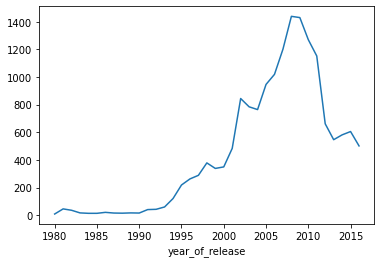

In [44]:
display([data.groupby('year_of_release')['name'].count()])
data.groupby('year_of_release')['name'].count().plot()

Данные до 1994 кратно меньше значений последующие года. Поэтому их можно считать их не важными для анализа


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Это правильно</div>

## Посмотрите, как менялись продажи по платформам.
Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?

In [45]:
# посмотрим список платформ
display(data['platform'].unique())
def plat_list(data):
    platform_list = data['platform'].unique().tolist()
    return platform_list
platform_list = plat_list(data)
print('Общее количество платформ равно: ',data['platform'].nunique())

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

Общее количество платформ равно:  31


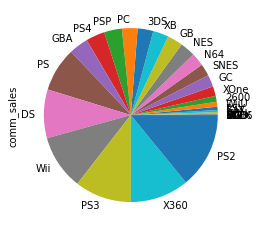

In [46]:
# посмотрим на доли в общих продажах
data.groupby('platform')['comm_sales'].sum().sort_values().plot(kind='pie');

Отберем список крупнейших (возмем 3/4 "пирога"):

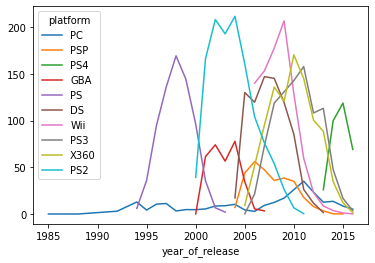

In [47]:
cutoff = 0.75 # доля, которую занимают крупнейшие платформы
def largest_platform_sales(cutoff,data):
    platform = (data.groupby('platform')['comm_sales'].sum().
                sort_values().to_frame())
    platform['cum_sum']=platform['comm_sales'].cumsum()
    total_sales = platform['comm_sales'].sum()
    largest = platform[platform['cum_sum']>(1-cutoff)*total_sales].index.tolist()

    platform_sales = data.pivot_table(index='year_of_release',
                     columns='platform',values='comm_sales',aggfunc='sum')
    platform_sales['largest_sum']=platform_sales[largest].sum(axis=1)
    # Оценим время жизни платформ
    for clmn in platform_list:
        year_min = platform_sales[platform_sales[clmn]>0].index.min()
        year_max = platform_sales[platform_sales[clmn]>0].index.max()
        year_high = platform_sales[platform_sales[clmn]==platform_sales[clmn].max()].index
        life_time = year_max-year_min
        rise_time = year_high-year_min
        fall_time = year_max-year_high
        platform.loc[clmn,'year_min']=year_min
        platform.loc[clmn,'year_max']=year_max
        platform.loc[clmn,'life_time']=life_time
        platform.loc[clmn,'rise_time']=rise_time
        platform.loc[clmn,'fall_time']=fall_time
    return largest, platform, platform_sales
largest, platform, platform_sales = largest_platform_sales(cutoff,data)
#display(platform_sales[platform_sales['largest_sum']>0][largest])
# Построим график
platform_sales[platform_sales['largest_sum']>0][largest].plot();

Все платформы имеют характерные периоды взлетов и падений продаж. Только ПиСи не умирает.
Основная активность приходится на период с 2000 до 2012-2013 гг. Очевидно это ("умирание" рынка после 2013г) связано с появлением больших и достаточно мощных смартфонов и игр на них, а также ростом популярности браузерных игр (в т.ч. внутри соц.сетей)

In [48]:
largest, platform, platform_sales = largest_platform_sales(0.75,data)
print('Статистика по времении жизни ВСЕХ платформ:')
print('Минимальное время: ',platform['life_time'].min())
print('Максимальное время: ',platform['life_time'].max())
print('Медианное время: ',platform['life_time'].median())
print('-------------------------------------------------------------')
print('Статистика по времении жизни КРУПНЕЙШИХ (75% рынка) платформ:')
print('Минимальное время: ',platform.loc[largest]['life_time'].min())
print('Максимальное время: ',platform.loc[largest]['life_time'].max())
print('Медианное время: ',platform.loc[largest]['life_time'].median())
print('-------------------------------------------------------------')
largest, platform, platform_sales = largest_platform_sales(0.5,data)
print('Статистика по времении жизни КРУПНЕЙШИХ (50% рынка) платформ:')
print('Минимальное время: ',platform.loc[largest]['life_time'].min())
print('Максимальное время: ',platform.loc[largest]['life_time'].max())
print('Медианное время: ',platform.loc[largest]['life_time'].median())

Статистика по времении жизни ВСЕХ платформ:
Минимальное время:  0.0
Максимальное время:  31.0
Медианное время:  7.0
-------------------------------------------------------------
Статистика по времении жизни КРУПНЕЙШИХ (75% рынка) платформ:
Минимальное время:  3.0
Максимальное время:  31.0
Медианное время:  11.0
-------------------------------------------------------------
Статистика по времении жизни КРУПНЕЙШИХ (50% рынка) платформ:
Минимальное время:  10.0
Максимальное время:  28.0
Медианное время:  11.0


Успешные (крупнейшие) платформы живут дольше медианы рынка на 57%


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Здесь стоит посмотреть на продажи по нескольким платформам (более подробно). Это поможет сделать точечные выводы</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Уважаемый ревьюер, прошу обратить внимание на формулировку задачи: "Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?"

Именно это и сделано, причем с возможностью варировать "наибольшесть". Для меня, конечно, не сложно рассмотреть каждый ряд данных отдельно, но что мы таким образом получим дополнительно? Ведь - характерное время жизни - это и есть медиана или среднее по лайф циклам не так ли? Какие точечные выводы вы хотите увидеть дополнительно? Время активной жизни (на пике)? )) </div>


<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b>Спасибо за аргументацию.  Прошу обратить внимание на формулировку "Посмотрите, как менялись продажи по платформам. Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам. За какой характерный срок появляются новые и исчезают старые платформы?". Имеет смысл посмотреть по нескольким платформам на продажи, не по всем конечно, но по топу прибыльных </div>

<div class="alert alert-info"> <b>Комментарий студента /версия2:</b>  Ок. Давайте еще раз, по порядку:
Посмотрим, как менялись продажи по платформам:</div>

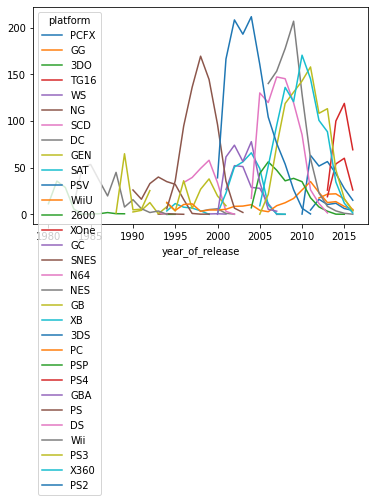

In [49]:
cutoff = 1
largest, platform, platform_sales = largest_platform_sales(cutoff,data)
platform_sales[platform_sales['largest_sum']>0][largest].plot();

<div class="alert alert-info"> Посмотрели. Выше  я сразу посмотрел 75% рынка. Здесь - 100%.

Следующая часть "Выберите платформы с наибольшими суммарными продажами и постройте распределение по годам" </div>

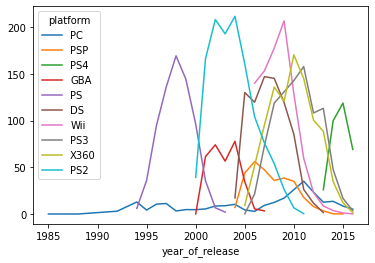

In [50]:
cutoff = 0.75
largest, platform, platform_sales = largest_platform_sales(cutoff,data)
platform_sales[platform_sales['largest_sum']>0][largest].plot();

<div class="alert alert-info"> Взяли 75% крупнейших игроков рынка. Построили распределение по годам.
Посмотрим еще более узкий сегмент: крупнейшие 50% рынка. </div>

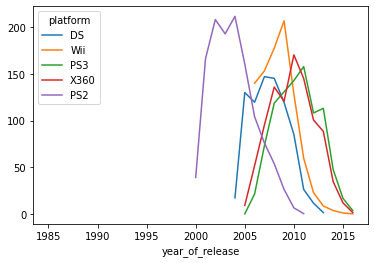

In [51]:
cutoff = 0.5
largest, platform, platform_sales = largest_platform_sales(cutoff,data)
platform_sales[platform_sales['largest_sum']>0][largest].plot();

<div class="alert alert-info"> Мы и посмотрели несколько крупнейших. Посмотрели на продажи. Динамика по годам.

Если это не то, то что требуется? </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v3.0:</b>☀️Спасибо за то, что более подробно посмотрел</div>

<div class="alert alert-info"> Следующий подпункт: "за какой характерный срок появляются новые и исчезают старые платформы?" </div>

In [52]:
stat_list = ['min','max','median','mean']
life_time = pd.DataFrame(index=stat_list)
clmn_list = ['life_time','rise_time','fall_time']
market_share = [1,0.75,0.5]

for m in market_share:
    largest, platform, platform_sales = largest_platform_sales(m,data)
    for clmn in clmn_list:
        clmn_l = clmn+'_'+str(m)
        life_time.loc['min',clmn_l]=platform.loc[largest][clmn].min()
        life_time.loc['max',clmn_l]=platform.loc[largest][clmn].max()
        life_time.loc['median',clmn_l]=platform.loc[largest][clmn].median()
        life_time.loc['mean',clmn_l]=platform.loc[largest][clmn].mean()

life_time



,life_time_1,rise_time_1,fall_time_1,life_time_0.75,rise_time_0.75,fall_time_0.75,life_time_0.5,rise_time_0.5,fall_time_0.5
min,0.00000,0.000000,0.000000,3.0,2.0,1.0,10.0,3.0,5.0
max,31.00000,26.000000,21.000000,31.0,26.0,9.0,28.0,22.0,7.0
median,7.00000,2.000000,5.000000,11.0,4.0,5.5,11.0,5.0,6.0
mean,8.16129,3.451613,4.709677,13.2,7.8,5.4,14.2,8.0,6.2


<div class="alert alert-info"> Добавил еще среднее время жизни. Также добавил данные по времени роста продаж до максимума и время снижения. Мы видим характерные данные как по всему рынку, так и по сегменту крупнейших платформ в двух срезах: 75% и 50% крупнейших компаний

К данным выше добавим то, что:

- все платформы растут в реднем 5.2 года, снижаются - 4.9
- крупнейшие 75% рынка растут в среднем 7.8 года, снижаются - 5.4
- крупнейшие 50% рынка растут в среднем 8 лет, снижаются - 6.2

    </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v3.0:</b>☀️Хорошо. Можем обратить внимание, что в среднем продажи по платформам могут упасть за 4-6 лет</div>

## Возьмите данные за соответствующий актуальный период.
Актуальный период определите самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.

Период наибольшей активности определили выше: с 2000-2002 до 2012-2013. Это соответсвует медианной длительности  жизни платформ. Но поскольку нам нам необходимо делать прогноз на 2017 г. Возьмем все данные старше 2002 г.


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит</div>

<div class="alert alert-info"> <b>Комментарий студента:</b> Вы знаете?- я попробовал взять только последние 3 года. Мне не понравилось. Мы таким образом ниикак не улучшаем качество анализа (применительно к агг=реггированным годовым данным), наоборот отбрасываем значительную часть важной информации. Я поставил переменную year_cutoff. Поставьте туда 2014 и вы получите куцые ряды и убогие графики, на которых легко сделать ошибочные выводы. Считаю, что сфокусировать анализ на послених 2-3 годах мы можем всегда при наличии данных. Но вот расширить взгляд и получить более общие выводы на жестко обрезанных данных - вряд ли получится. Согласен, что не имеет смысла брать данные "незрелого рынка" до 2000-х. И также согласен, что для анализа неаггрегированных годовых (а включая все "внутренние" данные) такое обрезание имеет смысл- это будет сделано при проверке стат.гипотез в конце работы.

Про "отжившие тренды": считаю, как раз они и формируют статистику по лайф-циклам платформ. Как мы видим паттерны динамики продаж у всех платформ (не одногодок) одинаковые. Ну и понятно, что в целом мы имеем дело с "отжишими трендами", т.к. все платформы фактически "умерли". Поэтому, может быть вариант с "захватить отжившие тренды" не так уж и плох, а наоборот- это улучшит качество анализа?
    
Кроме того выбор анализируемого периода в размере 2-3 лет при работе с годовыми данными означает, что <b> мы будем работать с рядами (выборками) длинной 2-3 значения!!!</b>. Вообще говоря, мы не можем применять к таким рядам статистические (не говоря уже про эконометрические) модели.

Поэтому еще раз - для анализа лайф-циклов оставил данные с 2003 г., Для проверки стат гипотез взял данные с 2014 г.</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b>Во-первых, данных с 2014 года достаточно для анализа. Во-вторых, прогноз на 2017 год - брать данные за 15 лет до этого - нерационально. Если посмотреть на продажи по конкретным платформам, можно наблюдать, что даже за 10 лет продажи падают, поэтому такой большой период некорректно брать для построения прогноза.</div>

<div class="alert alert-info"> <b>Комментарий студента /версия2: </b> Я взял данные с 2014 г. в пункте о проверке гипотез, где это действительно изменило результат. Но я не увидел там ваш комментарий.
    
В пунктах 9-13, насколько я понял, ранее вы выразили свое согласие с моим анализом, произведенным на данных с 2002 г. Поэтому данные в этих пунктах не резал.
    
Также в п.13 не увидел ваш комментарий относительно внесенных добавлений
    </div>


<div class="alert alert-danger">
<b>Комментарий ревьюера v3.0:</b> Ранее я оставила комментарий о том, что для прогнозирования чаще всего берут период 2-3 года. Красный комментарий свидетельствует о замечании, которое нужно исправить. Прошу прощения, что была не совсем "прямой" в своем комментарии. Для актуального периода лучше взять временной промежуток с 2014 года.</div>

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> ОК. Посмотрим на данных с 2014 г
    </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v4.0:</b> Спасибо большое за правки!</div>

## Не учитывайте в работе данные за предыдущие годы.

In [195]:
year_cutoff = 2014
data_cut = data[data['year_of_release']>=year_cutoff]
platform_list = plat_list(data_cut)
#platform_list

## Какие платформы:
- лидируют по продажам,
- растут или падают?

Выберите несколько потенциально прибыльных платформ

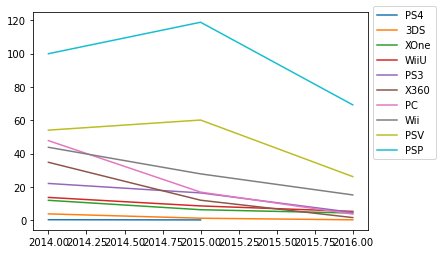

In [196]:
# Посмотрим 100% рынка
cutoff = 1
largest, platform, platform_sales = largest_platform_sales(cutoff,data_cut)
# Построим график
plt.plot(platform_sales[platform_sales['largest_sum']>0][largest]);
plt.legend(platform_list,bbox_to_anchor=(1, 1.05));

Визуально понятно, что динамика по всем платформам схожая - взлет, кульминация, спад. При этом часть платформ к текущему моменту (2016 г.) прекратили свое существование

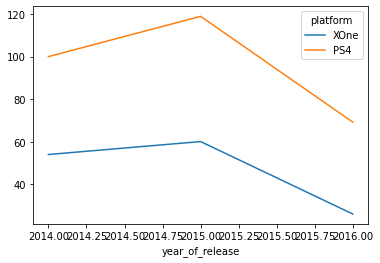

In [197]:
# Посмотрим 50% рынка
cutoff = 0.5
largest, platform, platform_sales = largest_platform_sales(cutoff,data_cut)
# Построим график
platform_sales[platform_sales['largest_sum']>0][largest].plot();

50% рынка за рассматриваемый период делили 2 платформы. Динамика аналогичная. И все большиие платформы фактически "умерли". Отберем платформы, которые имели продажи за 2016 г.

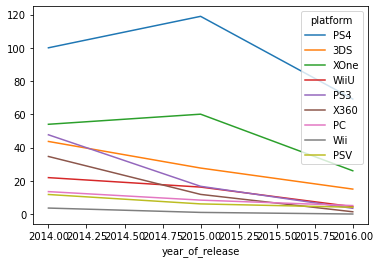

In [198]:
cutoff = 1
largest, platform, platform_sales = largest_platform_sales(cutoff,data_cut)
platform_current = []
for clmn in platform_list:
    if platform_sales.loc[2016,clmn]>0:
        platform_current.append(clmn)
platform_sales[platform_sales['largest_sum']>0][platform_current].plot();

Все "оставшиеся в живых" платформы снижают продажи. Лучше других (по абсолютным показателям) выглядит PS4, XOne, 3DS.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 👍 Тут трудно поспорить :)</div>

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> Выводы те же. Но графики на данных с 2014г. менеее информативны.
    </div>

## Постройте график «ящик с усами»
по глобальным продажам игр в разбивке по платформам. Опишите результат.

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> Смотрим данные с 2014 г.
    </div>

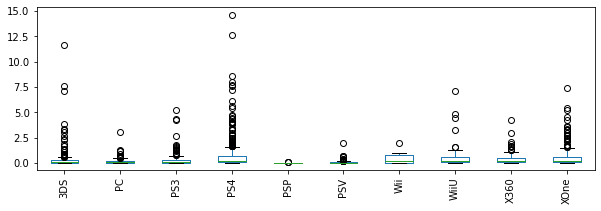

In [201]:
# смотрим данные с 2014 г.
# построим один "ящик" для всех платформ
data_cut.pivot_table(index='name',
                 columns='platform',values='comm_sales',
                 aggfunc='sum').plot(kind='box', figsize=(10,3),rot=90);

Видим, что из-за неравномерности продаж по разным платформам, маленькие платформы "подавляются" большими на графике. Чтобы не смотреть отдельные графики, нормализуем данные.

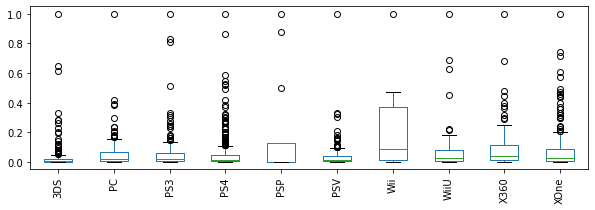

In [202]:
platform_sales_glob = data_cut.pivot_table(index='name',
                 columns='platform',values='comm_sales',
                 aggfunc='sum')
def data_norm(data_to_norm):
    data_norm = pd.DataFrame()
    for clmn in [column for column in data_to_norm]:
        if (data_to_norm.dtypes[clmn] != 'object' and
            data_to_norm.dtypes[clmn] != 'bool' and
            data_to_norm.dtypes[clmn] != 'datetime64[ns]'):
            data_norm[clmn] = data_to_norm[clmn]

    data_norm = (data_norm-data_norm.min())/(data_norm.max()-data_norm.min())
    return data_norm
data_norm(platform_sales_glob).plot(kind='box', figsize=(10,3),rot=90);

Видим, что почти все платформы имеют верхние выбросы. Посмотрим какой примерный процент отсечения необходим, чтобы "выровнять" данные

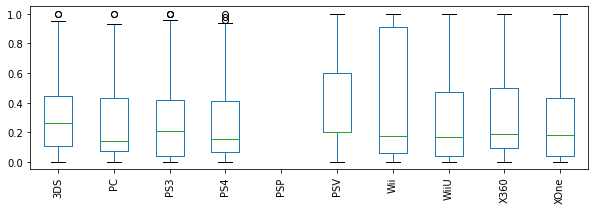

In [205]:
data_norm_filtred = data_norm(platform_sales_glob)
quan = 0.7
data_norm_filtred = data_norm_filtred[
    ~data_norm_filtred[data_norm_filtred < data_norm_filtred.quantile(quan)].isna()]
data_norm_filtred = data_norm(data_norm_filtred)
data_norm_filtred.plot(kind='box', figsize=(10,3),rot=90);

Перебрав разные проценты отсечения можно сделать вывод, что самые выдающиеся продажи находятся в верхних 5%. Но почти полное выравнивание данных происходит при отсечении верхних 30% игр. Данные распределены неравномерно. Большое большое количество верхних "тяжелых" по продажам игр.

## Посмотрите, как влияют отзывы пользователей и критиков
на продажи внутри одной популярной платформы . Постройте диаграмму рассеяния и посчитайте корреляцию между отзывами и продажами. Сформулируйте выводы.

В качестве "одной популярной платформы" рассмотрим PS3- это один из оставшихся в живых лидеров со значительными объемом продаж и достаточным объемом информации для исследования. Плюс, как мы выяснили выше, пропуски в полях оценок распределены в датасете достаточно равномерно, поэтому выбирать платформу с наименьшим удельным весом пропусков в полях оценок не будем.

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> Смотрим данные с 2014 г.
    </div>

In [60]:
# вспомним названия полей
[base_list]

[['name',
  'platform',
  'year_of_release',
  'genre',
  'na_sales',
  'eu_sales',
  'jp_sales',
  'other_sales',
  'critic_score',
  'user_score',
  'rating']]

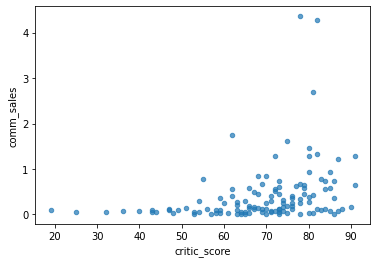

In [206]:
# построим диаграмму рассеяния
(data_cut[data_cut['platform']=='PS3'].
    plot.scatter (x = 'critic_score', y = 'comm_sales',alpha=0.7));

Видим неярко выраженную (несильную) прямую зависимость между оценками критиков и общими продажами. Вержняя часть множества точек диаграммы ограничена (чисто визуально) гиперболой.

Посмотрим данные с отсечением верхних 5% значений продаж

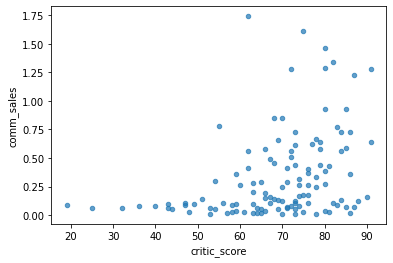

In [208]:
(data_cut[(data_cut['platform']=='PS3')&
      (data_cut['comm_sales']<data_cut['comm_sales'].quantile(0.95))].
    plot.scatter (x = 'critic_score', y = 'comm_sales',alpha=0.7));


На данных без выбросов прямая зависимость выражена более заметно.

Посчитаем корреляцию

In [210]:
# по всем данным
data_cut[data_cut['platform']=='PS3'][['critic_score','comm_sales']].corr()

,critic_score,comm_sales
critic_score,1.000000,0.303412
comm_sales,0.303412,1.000000


In [211]:
# по данным без выбросов
(data_cut[(data_cut['platform']=='PS3')&
      (data_cut['comm_sales']<data_cut['comm_sales'].
       quantile(0.95))][['critic_score','comm_sales']].corr())

,critic_score,comm_sales
critic_score,1.000000,0.356797
comm_sales,0.356797,1.000000


На данных без выбросов уровень статистической взаимосвязи между продажами и оценками критиков для платформы PS3 можно условно охарактеризовать как средний.

Посмотрим взаимосвязь между продажами и оценками пользователей. Также помним, что в данном поле есть значения "-1" (ex "tbd") которые необходимо исключить.

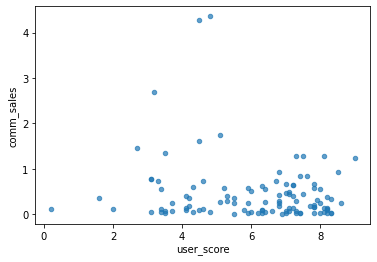

In [212]:
# построим диаграмму рассеяния
(data_cut[(data_cut['platform']=='PS3') &
      (data_cut['user_score']!=-1)].
    plot.scatter (x = 'user_score', y = 'comm_sales',alpha=0.7));

На полных данных визуально связь хуже просматривается, чем в случае с оценками критиков.

Уберем верхние 5%

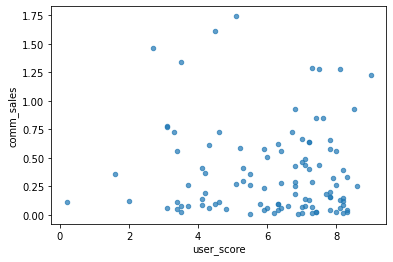

In [213]:
(data_cut[(data_cut['platform']=='PS3') &
      (data_cut['user_score']!=-1) &
      (data_cut['comm_sales']<data_cut['comm_sales'].quantile(0.95))].
    plot.scatter (x = 'user_score', y = 'comm_sales',alpha=0.7));

Вывод о наличии зависимости сделать нельзя.

Посмотрим корреляцию

In [214]:
# по всем данным
data_cut[(data_cut['platform']=='PS3') &
      (data_cut['user_score']!=-1)][['user_score','comm_sales']].corr()

,user_score,comm_sales
user_score,1.000000,-0.153515
comm_sales,-0.153515,1.000000


In [216]:
# Уберем верхние 5%
(data_cut[(data_cut['platform']=='PS3') &
      (data_cut['user_score']!=-1) &
      (data_cut['comm_sales']<data_cut['comm_sales'].quantile(0.95))]
    [['user_score','comm_sales']].corr())

,user_score,comm_sales
user_score,1.000000,-0.040017
comm_sales,-0.040017,1.000000


На данных с выбросами и без выбросов уровень статистической ОБРАТНОЙ взаимосвязи между продажами и оценками пользователей для платформы PS3 можно условно охарактеризовать как слабый.

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> Смотрим данные с 2014 г.
На данных с выбросами уровень статистической ОБРАТНОЙ взаимосвязи между продажами и оценками пользователей для платформы PS3 можно условно охарактеризовать как слабый. На данных без выбросов- как отсутствующий
    </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v4.0:</b>Да, это верно, так и есть</div>

## Соотнесите выводы с продажами игр на других платформах

In [218]:
# Функция для сбора корреляций по платформам
def plat_corr(d,quan):
    # d - DataFrame
    # quan - квантиль отсечения верхних значений продаж
    platform_list = plat_list(d)
    platform_corr = pd.DataFrame(index=platform_list)
    for p in platform_list:
        platform_corr.loc[p,'cr_score_full'] = (
            d[(d['platform']==p)]['comm_sales'].
            corr(d[d['platform']==p]['critic_score']))
        platform_corr.loc[p,'cr_score_crop'] = (
            d[(d['platform']==p) &
             (d['comm_sales']<d['comm_sales'].quantile(quan))
             ]['comm_sales'].
            corr(d[(d['platform']==p) &
             (d['comm_sales']<d['comm_sales'].quantile(quan))
                  ]['critic_score']))
        platform_corr.loc[p,'us_score_full'] = (
            d[(d['platform']==p) & (d['user_score']!=-1)]['comm_sales'].
            corr(d[(d['platform']==p) &
           (d['user_score']!=-1)]['user_score']))
        platform_corr.loc[p,'us_score_corp'] = (
            d[(d['platform']==p) & (d['user_score']!=-1) &
           (d['comm_sales']<d['comm_sales'].quantile(quan))
             ]['comm_sales'].
            corr(d[(d['platform']==p) & (d['user_score']!=-1) &
           (d['comm_sales']<d['comm_sales'].quantile(quan))
                  ]['user_score']))
    return platform_corr
plat_corr_cut = plat_corr(data_cut,0.95) # посмотрим на данных с 2014 г.

/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2683: RuntimeWarning: Degrees of freedom <= 0 for slice
  c = cov(x, y, rowvar, dtype=dtype)
/opt/conda/lib/python3.9/site-packages/numpy/lib/function_base.py:2542: RuntimeWarning: divide by zero encountered in true_divide
  c *= np.true_divide(1, fact)
/opt/conda/lib/python3.9/site-packages/n

Выдается предупреждение касательно деления на ноль. Но я не стал вводить дополнительные проверки, т.к. данные считаются правильно.

Посчитатем статистические метрики для таблицы корреляций

In [219]:
plat_corr_cut.describe()

,cr_score_full,cr_score_crop,us_score_full,us_score_corp
count,9.000000,9.000000,9.000000,8.000000
mean,0.304049,0.343378,0.111896,0.050049
std,0.087931,0.090364,0.381973,0.166411
min,0.150621,0.150621,-0.160024,-0.160024
25%,0.286751,0.310677,-0.124158,-0.041798
50%,0.307390,0.356797,-0.057391,0.017571
75%,0.381525,0.408213,0.196855,0.087605
max,0.390241,0.459310,1.000000,0.389225


Видим, что рассмотренная выше платформа PS3 обладает максимальной (среди других платформ) корреляцией между продажами и оценками критиков и входит в половину платформ с наибольшей зависимостью между продажами и оценками пользователей.


<div class="alert alert-success">
<b>Комментарий ревьюера:</b> 👍Согласна</div>

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> Смотрим данные с 2014 г.
На обрезанных данных с выбросами рассмотренная выше платформа PS3 обладает СРЕДНЕЙ (среди других платформ) корреляцией между продажами и оценками критиков и входит в первую четверть платформ с НАИМЕНЬШЕЙ зависимостью между продажами и оценками пользователей. Также появились платформы со слабой обратной зависимостью продаж от оценок
    </div>

## Посмотрите на общее распределение игр по жанрам.
Что можно сказать о самых прибыльных жанрах? Выделяются ли жанры с высокими и низкими продажами?

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> Смотрим данные с 2014 г.  </div>

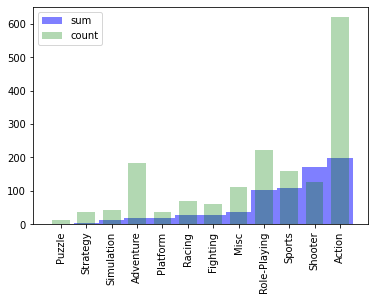

In [220]:
# построим диаграмму продаж по жанрам
agg_func = {'comm_sales': ['sum','count','mean','median']}
genre_sales = (data_cut.groupby('genre').agg(agg_func).
               sort_values(by=('comm_sales','sum')))
plt.bar(genre_sales.index, genre_sales[('comm_sales','sum')],
        1, alpha=0.5, color='b', label='sum')
plt.bar(genre_sales.index, genre_sales[('comm_sales','count')],
        0.7, alpha=0.3, color='g', label='count')
plt.xticks(rotation=90)
plt.legend()
plt.show()

Для данных за все года: Больше всего по количеству и сумме продавалось игр в жанрах Sports, Action. Меньше всего по сумме было продаж в жанрах: Strategy, Adventure, Pazzle.

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г. такие же лидеры   </div>

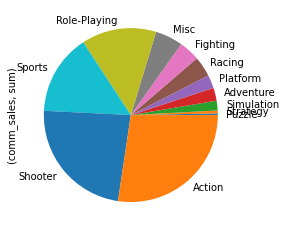

In [221]:
# посмотрим как поделен рынок по жанрам
genre_sales[('comm_sales','sum')].plot(kind='pie');

Для данных за все года: 4 жанра: Role-playing, Shooter, Sports, Action занимают более 50% глобального рынка

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г. 3 жанра: Shooter, Sports, Action занимают более 50% глобального рынка   </div>

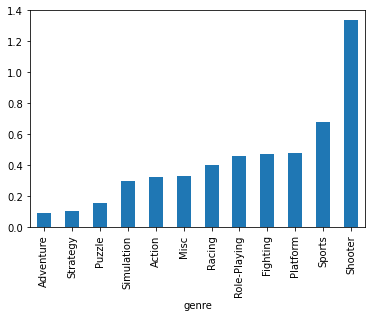

In [222]:
# Посчитаем среднюю цену игры
genre_sales['avg_price']=(genre_sales[('comm_sales','sum')]/
                          genre_sales[('comm_sales','count')])
genre_sales['avg_price'].sort_values().plot(kind='bar');

Для данных за все года:

Самые дорогие игры в жанрах: Role-Playing, Shooter, Platform.

Самые дешевые: Strategy, Adventure, Pazzle.

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г.:
    
Самые дорогие игры в жанрах: Shooter, Sports, Platform.

Самые дешевые: Adventure, Strategy, Pazzle.</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☀️Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Посмотрим как распределены медианные продажи по жанрам </div>

In [223]:
genre_sales.sort_values(by=('comm_sales','median'),inplace=True)

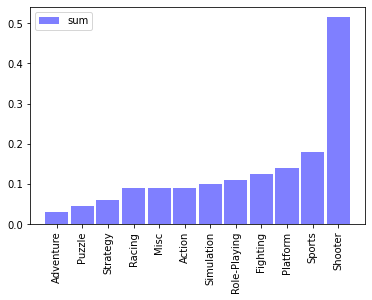

In [224]:
plt.bar(genre_sales.index, genre_sales[('comm_sales','median')],
        0.9, alpha=0.5, color='b', label='sum')
plt.xticks(rotation=90)
plt.legend()
plt.show()

<div class="alert alert-info"> <b>Комментарий студента:</b> Видим, что медианные продажи самые высокие в жанрах Platform, Shooter, Sports. Эти лидеры почти совпадают с лидерами по средней цене игры в жанре.

При этом, строго говоря, прибыль определяется доходами и расходами (в разном их исчислении). В рамках данного проекта и на основе данного датасета мы не можем оценить расходную часть. Поэтому правильнее было бы говорить поиске жанров с наибольшими (наиболее стабильными и т.п.) продажами. </div>


<div class="alert alert-warning">
<b>Комментарий ревьюера v3.0:</b>☀️Здесь нужно скорректировать исследование под новый актуальный период и посмотреть, как поменяются результаты. Хотя даже так видно, что результаты по общим продажам и по медианным разные. Медианные/средние продажи лучше характеризуют "стабильность" ситуации </div>

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г.:
    
Видим, что медианные продажи самые высокие в жанрах Platform, Shooter, Sports. Эти лидеры полностью совпадают с лидерами медианной цене игры в жанре на данных за все года. </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v4.0:</b>Спасибо! Да, как видишь, результаты здесь изменились</div>

# Шаг 4.
Составьте портрет пользователя каждого региона
Определите для пользователя каждого региона (NA, EU, JP):

## Самые популярные платформы (топ-5).
Опишите различия в долях продаж.

In [225]:
# построим сводный датафрейм продаж по платформам
# d = data_cut # посмотрим данные с 2002 г.
def top_sales(d,category):
    top_plat_reg = pd.DataFrame()
    top_plat_reg = pd.concat((top_plat_reg,
          d.groupby(category)['na_sales'].sum().nlargest(5),
          d.groupby(category)['eu_sales'].sum().nlargest(5),
          d.groupby(category)['jp_sales'].sum().nlargest(5),
          d.groupby(category)['other_sales'].sum().nlargest(5),
                             ),axis=1)
    # долю продаж считаем от общих продаж (не в топ 5)
    top_plat_reg['na_share']=top_plat_reg['na_sales']/d['na_sales'].sum()
    top_plat_reg['eu_share']=top_plat_reg['eu_sales']/d['eu_sales'].sum()
    top_plat_reg['jp_share']=top_plat_reg['jp_sales']/d['jp_sales'].sum()
    top_plat_reg['other_share']=top_plat_reg['other_sales']/d['other_sales'].sum()

    # словарь для форматирования вывода
    d_style = {'na_sales':'{:.1f}','eu_sales':'{:.1f}','jp_sales':'{:.1f}','other_sales':'{:.1f}',
               'na_share':'{:.1%}','eu_share':'{:.1%}',
                'jp_share':'{:.1%}','other_share':'{:.1%}'}

    disp_list = ['na_sales','na_share','eu_sales','eu_share',
    'jp_sales','jp_share','other_sales','other_share']
    
    return d_style, disp_list, top_plat_reg

d_style, disp_list, top_plat_reg = top_sales(data_cut,'platform')
top_plat_reg[disp_list].style.format(d_style)

,na_sales,na_share,eu_sales,eu_share,jp_sales,jp_share,other_sales,other_share
PS4,98.6,34.7%,130.0,48.0%,15.0,16.1%,44.5,54.5%
XOne,81.3,28.6%,46.3,17.1%,nan,nan%,12.5,15.3%
X360,28.3,10.0%,nan,nan%,nan,nan%,4.3,5.3%
3DS,22.6,8.0%,16.1,5.9%,44.2,47.5%,3.7,4.5%
PS3,22.1,7.8%,25.5,9.4%,11.2,12.1%,9.4,11.5%
PC,nan,nan%,18.2,6.7%,nan,nan%,nan,nan%
PSV,nan,nan%,nan,nan%,14.5,15.6%,nan,nan%
WiiU,nan,nan%,nan,nan%,7.3,7.9%,nan,nan%


<div class="alert alert-info"> <b> На данных с 2002 г. </b> </div>

Топ5 платформ в Америке, Европе и в других регионах (кроме Японии) совпадают. Но лидеры различаются: в Америке - X360, в Европе- PS3, в других регионах- PS2. Японский Топ5 возглавляет DS с большим удельным весом в 25% (Это логично следует из страны происхождения платформ), также в японском Топ5 есть 3DS и PSP, которых нет в Топ5 остального (кроме Японии) мира и в японский топ не вошли X360 и Wii.



<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г.:
    
Топ5 платформ в Америке, и в других регионах (кроме Европы  и Японии) совпадают.
ТОП5 Европы почти совпадает с Америкой, за исключением X360, вместо нее в европейский ТОП5 вошел PC. Японский Топ5 возглавляет 3DS с большим удельным весом в 48% (Это логично следует из страны происхождения платформ), также в японском Топ5 есть PSV и WiiU, которых нет в Топ5 остального (кроме Японии) мира и в японский топ не вошли X360 и XOne.
</div>

## Самые популярные жанры (топ-5). Поясните разницу

In [226]:
# построим сводный датафрейм продаж по жанрам
# d = data_cut # посмотрим данные с 2002 г.
d_style, disp_list, top_plat_reg = top_sales(data_cut,'genre')
top_plat_reg[disp_list].style.format(d_style)

,na_sales,na_share,eu_sales,eu_share,jp_sales,jp_share,other_sales,other_share
Shooter,79.0,27.8%,65.5,24.2%,4.9,5.2%,21.5,26.4%
Action,72.6,25.5%,74.9,27.7%,29.6,31.8%,22.6,27.7%
Sports,46.1,16.2%,45.7,16.9%,nan,nan%,14.4,17.6%
Role-Playing,33.5,11.8%,28.2,10.4%,31.2,33.5%,8.6,10.6%
Misc,15.0,5.3%,nan,nan%,5.6,6.0%,4.0,4.9%
Racing,nan,nan%,14.1,5.2%,nan,nan%,nan,nan%
Fighting,nan,nan%,nan,nan%,6.4,6.8%,nan,nan%


<div class="alert alert-info"> <b> На данных с 2002 г. </b> </div>
Американский Топ5 жанров возглавляет Action. Первые 4 места у Америки и Европы - одинаковые с соответствующим лидерством и убыванием долей. 5-е место в Америке - Role-Playing, в Европе- Racing (при всем американском Наскаре и т.п., Европа больше любит и умеет в скорость).

Японцы любят Role-Playing на 29.3% от всего своего рынка, при этом в японский Топ5 не попали Shooter и Racing. Скорее всего, сказываются общие культурные различия и предпочтения.

Другие регионы (other_sales) - аналогичны по своим предпочтениям и долям продаж Европе.

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г.:
    
Американский Топ5 жанров возглавляет Shooter. Первые 4 места у Америки и Европы - одинаковые с соответствующим лидерством и убыванием долей. 5-е место в Америке - Misc, в Европе- Racing (при всем американском Наскаре и т.п., Европа больше любит и умеет в скорость).
Японцы любят Role-Playing на 34% от всего своего рынка, при этом в японский Топ5 не попал Sports. Также по сравнению с прошлыми годами в японский ТОП5 добавились жанры Shooter	и Fighting. Японский рынок стал более толерантным к жестоким играм. 

Другие регионы (other_sales) - аналогичны по своим предпочтениям и долям продаж Америке.
</div>


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b>☀️Выводы верные! Стоит сказать, что здесь не хватает визуализации. Например, можно построить круговые диаграммы в ряд для трех регионов с помощью subplots().
</div>


Добавим графиков!!

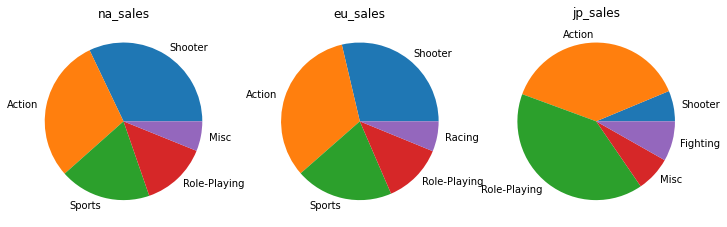

In [227]:
x1 = top_plat_reg[top_plat_reg['na_sales'].notna()].index
y1 = top_plat_reg[top_plat_reg['na_sales'].notna()]['na_sales']
x2 = top_plat_reg[top_plat_reg['eu_sales'].notna()].index
y2 = top_plat_reg[top_plat_reg['eu_sales'].notna()]['eu_sales']
x3 = top_plat_reg[top_plat_reg['jp_sales'].notna()].index
y3 = top_plat_reg[top_plat_reg['jp_sales'].notna()]['jp_sales']
x4 = top_plat_reg[top_plat_reg['other_sales'].notna()].index
y4 = top_plat_reg[top_plat_reg['other_sales'].notna()]['other_sales']

figure, axis = plt.subplots(1, 3, figsize=(12,8))

axis[0].pie(y1,labels=x1)
axis[0].set_title("na_sales")
  
axis[1].pie(y2,labels=x2)
axis[1].set_title("eu_sales")
  
axis[2].pie(y3,labels=x3)
axis[2].set_title("jp_sales")
  
#axis[1, 1].pie(y4,labels=x4)
#axis[1, 1].set_title("other_sales")
  
plt.show()


<div class="alert alert-success">
<b>Комментарий ревьюера v4.0:</b>Отлично :) Так смотрится ярче , интереснее и информативнее</div>

## Влияет ли рейтинг ESRB на продажи в отдельном регионе

Посмотрим как распределены продажи по рейтингам

,na_sales,eu_sales,jp_sales,other_sales,rating_dig
rating,,,,,
M,104.32,102.10,8.61,31.50,6.0
E,50.81,58.32,8.98,15.42,1.0
T,40.28,35.33,16.28,11.76,5.0
E10+,34.56,27.51,4.77,8.23,4.0


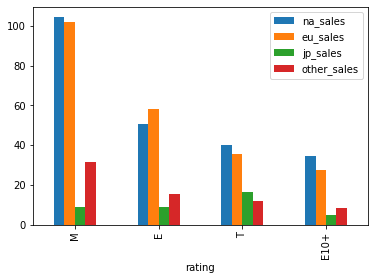

In [228]:
d = data_cut # используем данные с 2014 г.
reg_list = ['na_sales','eu_sales','jp_sales','other_sales']
rating_sales = (d.groupby('rating')[reg_list].sum().
                sort_values(by='na_sales',ascending=False))
rating_sales = pd.concat((rating_sales,
              d.groupby('rating')['rating_dig'].first()),axis=1)
display(rating_sales)
rating_sales[reg_list].plot(kind='bar');

Видим, что зависимость продаж от рейтинга есть и она одинаковая во всех регионах. Больше всего продаж игр с рейтингом "E" (для всех возрастов). Но убывание продаж идет не строго по росту возрастного ценза. Второй рейтинг по объему продаж- "М" (17+), далее- "Т" (13+).  В Японии игры с рейтингом "Т" продаются лучше "М"

<div class="alert alert-info"> <b>Комментарий студента /версия3: </b> На данных с 2014 г.:
    
Видим, что зависимость продаж от рейтинга есть и она одинаковая во всех регионах. Больше всего продаж игр с рейтингом "М" (17+). Второй рейтинг по объему продаж- "E" (для всех возрастов), далее- "Т" (13+). В Японии другой ранк: 1-е место "Т", 2-е "Е", потом "М" и "Е10+"
    
</div>

# Шаг 5. Проверьте гипотезы

## Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

Считаем, что оценки пользователей для разных платформ выставляются независимо. Таким образом нам необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей.

Используем встроенный t-тест и сравним возвращаемый тестом уровень значимости с заданным критическим уровнем

- Н0 - Среднее выборки поля user_score для платформы XBox (X360) равно такому же среднему для PC
- Н1 - соответственно- не равно

In [80]:
year_cutoff = 2013
data_cut = data[data['year_of_release']>year_cutoff]

In [81]:
d = data_cut # используем данные с 2002 г
# не забываем исключить из рассмотрения пустые значения и "-1"
xbox_score = d[(d['platform']=='X360') & (d['user_score']!=-1) &
         (d['user_score'].notna())]['user_score']
pc_score   = d[(d['platform']=='PC')  & (d['user_score']!=-1) &
         (d['user_score'].notna())]['user_score']



print('Средняя пользовательская оценка для XBox: ',round(xbox_score.mean(),2))
print('Средняя пользовательская оценка для PC: ',round(pc_score.mean(),2))

alpha = 0.01 # критический уровень статистической значимости %

results = st.ttest_ind(
    xbox_score, 
    pc_score,equal_var = False)

print('Критический уровень статистической значимости','{:,.1%}'.format(alpha))
print('p-значение:', '{:,.4%}'.format(results.pvalue))

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя пользовательская оценка для XBox:  5.77
Средняя пользовательская оценка для PC:  6.29
Критический уровень статистической значимости 1.0%
p-значение: 3.5961%
Не получилось отвергнуть нулевую гипотезу


Не отвергаем гипотезу о равенстве пользовательских рейтингов. Верно и для alpha=5%

## Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные

Считаем, что оценки пользователей для разных жанров выставляются независимо. Таким образом нам необходимо проверить гипотезу о равенстве среднего двух генеральных совокупностей.

Используем встроенный t-тест и сравним возвращаемый тестом уровень значимости с заданным критическим уровнем

- Н0 - Среднее выборки поля user_score для жанра Action НЕ равно такому же среднему для Sports
- Н1 - соответственно - равно

In [82]:
year_cutoff = 2013
data_cut = data[data['year_of_release']>year_cutoff]

In [83]:
d = data_cut # используем данные с 2002 г
# не забываем исключить из рассмотрения пустые значения и "-1"
action_score = d[(d['genre']=='Action') & (d['user_score']!=-1) &
         (d['user_score'].notna())]['user_score']
sports_score = d[(d['genre']=='Sports')  & (d['user_score']!=-1) &
         (d['user_score'].notna())]['user_score']



print('Средняя пользовательская оценка для Action: ',
      round(action_score.mean(),2))
print('Средняя пользовательская оценка для PC: ',
      round(sports_score.mean(),2))

alpha = 0.01 # критический уровень статистической значимости %

results = st.ttest_ind(
    action_score, 
    sports_score,equal_var = False)

print('Критический уровень статистической значимости','{:,.1%}'.format(alpha))
print('p-значение:', '{:,.4%}'.format(results.pvalue))

if results.pvalue > alpha: # здесь установим >
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

Средняя пользовательская оценка для Action:  6.8
Средняя пользовательская оценка для PC:  5.25
Критический уровень статистической значимости 1.0%
p-значение: 0.0000%
Не получилось отвергнуть нулевую гипотезу


Не отвергаем гипотезу о разных средних рейтингах для Action и Sports. Верно и для alpha=5%


<div class="alert alert-danger">
<b>Комментарий ревьюера:</b> В проверке гипотез у тебя отличная логика! Очень хорошо, что ты выводишь значения сравниваемых параметров. Осталось только скорректировать это под новый актуальный период
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Изменение анализируемого периода изменило вывод для первой гипотезы! </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v3.0:</b>☀️Да, спасибо за правки. </div>

# Шаг 6. Общий вывод

1. Выделить какие то факторы в полях датасета, однозначно определяющие появление значительной части пропусков (кроме проведенных замен) в поле rating (равно как и в поле user_score и critic_score) не получается. Данные пропуски распределены в датасете достаточно равномерно. Их появление обусловлено техническими причинами (ошибки при копировании, выгрузке, расчтах данных)

2. Все игровые платформы имеют характерные периоды взлетов и падений продаж. Основная активность приходится на период с 2000 до 2012-2013 гг. Очевидно, что снижение продаж видеоигр связано с появлением больших и достаточно мощных смартфонов и игр на них, а также ростом популярности браузерных игр (в т.ч. внутри соц.сетей)

3. Статистика по времении жизни КРУПНЕЙШИХ (75% рынка) платформ:
    
    - Минимальное время:  3.0
    - Максимальное время:  31.0
    - Медианное время:  11.0

Добавление
<div class="alert alert-info"> К данным выше добавим то, что:

- все платформы растут в реднем 5.2 года, снижаются - 4.9
- крупнейшие 75% рынка растут в среднем 7.8 года, снижаются - 5.4
- крупнейшие 50% рынка растут в среднем 8 лет, снижаются - 6.2
</div>
*
4. Все "оставшиеся в живых" на 2016г. платформы снижают продажи со своих максимумов. Лучше других (по абсолютным показателям) выглядят PS4, XOne, 3DS.


5. Медианное значений корреляцией:
* На данных с 2002 г.:
- между глобальными продажами и оценками критиков составляет 0.32, что можно охарактеризовать как среднюю прямую зависимость.
- между глобальными продажами и оценками пользователей составляет 0.17, что можно охарактеризовать как слабую прямую зависимость.

<div class="alert alert-info"> на данных с 2014 г.:

Видим, что медианное значений корреляцией:
- между глобальными продажами и оценками критиков составляет 0.35, что можно охарактеризовать как среднюю прямую зависимость.
- между глобальными продажами и оценками пользователей составляет 0.017, что можно охарактеризовать как отсутствие зависимости.
</div>
* 

6. Больше всего по количеству и сумме продавалось игр в жанрах Sports, Action. Меньше всего по сумме было продаж в жанрах: Strategy, Adventure, Pazzle.
<div class="alert alert-info">
    
    - На данных с 2014 г. такие же лидеры
    
    - медианные продажи на данных с 2014 г самые высокие в жанрах Platform, Shooter, Sports. Эти лидеры полностью совпадают с лидерами медианной цене игры в жанре на данных за все года.
</div>

7. На данных с 2002 г. Топ5 платформ в Америке, Европе и в других регионах (кроме Японии) совпадают. Но лидеры различаются: в Америке - X360, в Европе- PS3, в других регионах- PS2. Японский Топ5 возглавляет DS с большим удельным весом в 25%.
<div class="alert alert-info"> На данных с 2014 г.:    
Топ5 платформ в Америке, и в других регионах (кроме Европы  и Японии) совпадают.
ТОП5 Европы почти совпадает с Америкой, за исключением X360, вместо нее в европейский ТОП5 вошел PC. Японский Топ5 возглавляет 3DS с большим удельным весом в 48% (Это логично следует из страны происхождения платформ), также в японском Топ5 есть PSV и WiiU, которых нет в Топ5 остального (кроме Японии) мира и в японский топ не вошли X360 и XOne.
</div>

8. Н данных  с 2002 г. Американский Топ5 жанров возглавляет Action. Первые 4 места у Америки и Европы - одинаковые с соответствующим лидерством и убыванием долей. Японцы любят Role-Playing на 29.3%, при этом в японский Топ5 не попали Shooter и Racing. Скорее всего, сказываются общие культурные различия и предпочтения.
<div class="alert alert-info"> На данных с 2014 г.:
Американский Топ5 жанров возглавляет Shooter. Первые 4 места у Америки и Европы - одинаковые с соответствующим лидерством и убыванием долей. 5-е место в Америке - Misc, в Европе- Racing (при всем американском Наскаре и т.п., Европа больше любит и умеет в скорость).
Японцы любят Role-Playing на 34% от всего своего рынка, при этом в японский Топ5 не попал Sports. Также по сравнению с прошлыми годами в японский ТОП5 добавились жанры Shooter	и Fighting. Японский рынок стал более толерантным к жестоким играм. 
Другие регионы (other_sales) - аналогичны по своим предпочтениям и долям продаж Америке.
</div>

9. На данных с 2002 г. Выявлена зависимость продаж от рейтинга есть и она одинаковая во всех регионах. Больше всего продаж игр с рейтингом "E" (для всех возрастов). Но убывание продаж идет не строго по росту возрастного ценза. Второй рейтинг по объему продаж- "М" (17+), далее- "Т" (13+). В Японии игры с рейтингом "Т" продаются лучше "М"
<div class="alert alert-info"> На данных с 2014 г.:
Видим, что зависимость продаж от рейтинга есть и она одинаковая во всех регионах. Больше всего продаж игр с рейтингом "М" (17+). Второй рейтинг по объему продаж- "E" (для всех возрастов), далее- "Т" (13+). В Японии другой ранк: 1-е место "Т", 2-е "Е", потом "М" и "Е10+"
</div>

10. На данных с 2014 г. Проверили и не можем отвергнуть гипотезу о равенстве средних значений пользовательских рейтингов платформ Xbox One и PC.

11. На данных с 2014 г. Проверили и не отвергаем гипотезу о том, что средние пользовательские рейтинги жанров Action и Sports - разные


<div class="alert alert-success">
<b>Комментарий ревьюера:</b>☀️Спасибо за подробный общий вывод :)
</div>



<div class="alert alert-warning">
<b>Комментарий ревьюера:</b>☀️Григорий, спасибо тебе за твой проект! Ты отлично справился, видно, что приложено много усилий, однако есть моменты, которые нужно доработать. Подробнее о них ты узнаешь в моих комментариях по ходу проекта. Пожалуйста, ознакомься с ними и оставь свои :) Отправляю тебе проект на доработку и жду на повторное ревью. Все получится, успехов ! ;)
</div>


<div class="alert alert-info"> <b>Комментарий студента:</b> Благодарю за ревью! </div>


<div class="alert alert-danger">
<b>Комментарий ревьюера v2.0:</b> Благодарю за правки, которые ты внес. Пожалуйста, ознакомься с моими комментариями. </div>

<div class="alert alert-info"> Комментарий студента /версия2:
Внесены изменения в п.6
    
В пунктах 9-13, насколько я понял, ранее вы выразили свое согласие с моим анализом, произведенным на данных с 2002 г. Поэтому данные в этих пунктах не резал.

Также в п.13 не увидел ваш комментарий относительно внесенных добавлений
    
п.17-18. Я взял данные с 2014 г. в пункте о проверке гипотез, где это действительно изменило результат. Но я не увидел там ваш комментарий.
    </div>


<div class="alert alert-danger">
<b>Комментарий ревьюера v3.0:</b>☀️Теперь на все ответила. Осталось только скорректировать актуальный период. Успехов! Спасибо за четкую аргументацию </div>


<div class="alert alert-success">
<b>Комментарий ревьюера v4.0:</b>Спасибо за доработанные выводы и проект :) Ты большой молодец, все принято! Желаю успехов на поприще аналитики ;) Оставить свою позицию и давать аргументацию - важный навык, в будущем тебе это пригодится ;) </div>